In [ ]:
# DATA LOADING AND INTIAL LOOK

In [7]:
   import pandas as pd

   df = pd.read_csv("training.csv.zip") 


In [8]:
num_rows = df.shape[0]  # Rows
num_features = df.shape[1]  # Features

print(f"Number of rows: {num_rows}")
print(f"Number of features: {num_features}")

Number of rows: 12906
Number of features: 83


In [10]:
# Missing values for each column
missing_values = df.isnull().sum()
print(missing_values)

# Total missing values in dataset
total_missing = df.isnull().sum().sum()
print(f"\nTotal missing values in the dataset: {total_missing}")

patient_id           0
patient_race      6385
payer_type        1803
patient_state       51
patient_zip3         0
                  ... 
veteran              1
Ozone               29
PM25                29
N02                 29
DiagPeriodL90D       0
Length: 83, dtype: int64

Total missing values in the dataset: 43292


In [12]:
# Categorical or Numerical function
def get_feature_type(series):
    if series.dtype == 'object' or series.nunique() < 10:  # Categorical if object type or has fewer than 10 unique values
        return 'Categorical'
    else:
        return 'Numerical'

# Outlier detector function
def detect_outliers(series):
    if series.dtype in ['int64', 'float64']:  # Check only for numerical columns
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = series[(series < lower_bound) | (series > upper_bound)]
        return len(outliers) > 0
    return False

# Summary table
summary_table = []

for column in df.columns:
    feature_type = get_feature_type(df[column])
    unique_values = df[column].unique()[:10] if feature_type == 'Categorical' else f"{df[column].min()} to {df[column].max()}"
    num_missing = df[column].isnull().sum()
    outliers_present = detect_outliers(df[column]) if feature_type == 'Numerical' else 'N/A'
    
    summary_table.append({
        'Feature': column,
        'Type': feature_type,
        'Values': unique_values if feature_type == 'Categorical' else unique_values,
        'Missing Values': num_missing,
        'Outliers Present': outliers_present
    })

summary_df = pd.DataFrame(summary_table)
summary_df


,Feature,Type,Values,Missing Values,Outliers Present
0,patient_id,Numerical,100063 to 999896,0,False
1,patient_race,Categorical,"[nan, White, Other, Hispanic, Asian, Black]",6385,N/A
2,payer_type,Categorical,"[MEDICAID, COMMERCIAL, MEDICARE ADVANTAGE, nan]",1803,N/A
3,patient_state,Categorical,"[CA, TX, ID, NY, IL, nan, MI, OR, MT, KY]",51,N/A
4,patient_zip3,Numerical,101 to 999,0,False
...,...,...,...,...,...
78,veteran,Numerical,1.2 to 25.2,1,True
79,Ozone,Numerical,30.93931639 to 52.23720962,29,True
80,PM25,Numerical,2.636008213 to 11.16940832,29,True
81,N02,Numerical,2.760370724 to 31.50477477,29,False


In [26]:
target_column = 'DiagPeriodL90D'

import pandas as pd
df = pd.read_csv("training.csv.zip") 

# Check if the target is categorical or numerical
target_dtype = df[target_column].dtype

if target_dtype == 'object' or df[target_column].nunique() <= 10:
    print("**Classification Target Detected**")
    
    # Count the number of occurrences of each class
    class_distribution = df[target_column].value_counts()
    
    # Calculate the percentage of each class
    class_percentage = df[target_column].value_counts(normalize=True) * 100
    
    # Check if the target is encoded as 0, 1, etc.
    unique_classes = df[target_column].unique()
    
    print("\nClass Distribution:\n", class_distribution)
    print("\nClass Percentage:\n", class_percentage)
    print("\nUnique Class Labels (Encoding):", unique_classes)

else:
    print("**Regression Target Detected**")
    
    # Calculate the range for regression
    min_value = df[target_column].min()
    max_value = df[target_column].max()
    
    print(f"\nRange of Target Values: {min_value} to {max_value}")

**Classification Target Detected**

Class Distribution:
 DiagPeriodL90D
1    8060
0    4846
Name: count, dtype: int64

Class Percentage:
 DiagPeriodL90D
1    62.451573
0    37.548427
Name: proportion, dtype: float64

Unique Class Labels (Encoding): [1 0]


In [27]:
target_column = 'DiagPeriodL90D'

import pandas as pd
df = pd.read_csv("training.csv.zip") 

# Check if the target is categorical or numerical
target_dtype = df[target_column].dtype

if target_dtype == 'object' or df[target_column].nunique() <= 10:
    print("**Classification Target Detected**")
    
    # Count the number of occurrences of each class
    class_distribution = df[target_column].value_counts()
    
    # Calculate the percentage of each class
    class_percentage = df[target_column].value_counts(normalize=True) * 100
    
    # Check if the target is encoded as 0, 1, etc.
    unique_classes = df[target_column].unique()
    
    print("\nClass Distribution:\n", class_distribution)
    print("\nClass Percentage:\n", class_percentage)
    print("\nUnique Class Labels (Encoding):", unique_classes)

else:
    print("**Regression Target Detected**")
    
    # Calculate the range for regression
    min_value = df[target_column].min()
    max_value = df[target_column].max()
    
    print(f"\nRange of Target Values: {min_value} to {max_value}")

**Classification Target Detected**

Class Distribution:
 DiagPeriodL90D
1    8060
0    4846
Name: count, dtype: int64

Class Percentage:
 DiagPeriodL90D
1    62.451573
0    37.548427
Name: proportion, dtype: float64

Unique Class Labels (Encoding): [1 0]


In [ ]:
# DATA VISUALIZATION


Categorical Features:
Index(['patient_race', 'payer_type', 'patient_state', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division'],
      dtype='object')

Numerical Features:
Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorced', 'never_married', 'widowed',
       'family_size', 'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'inc

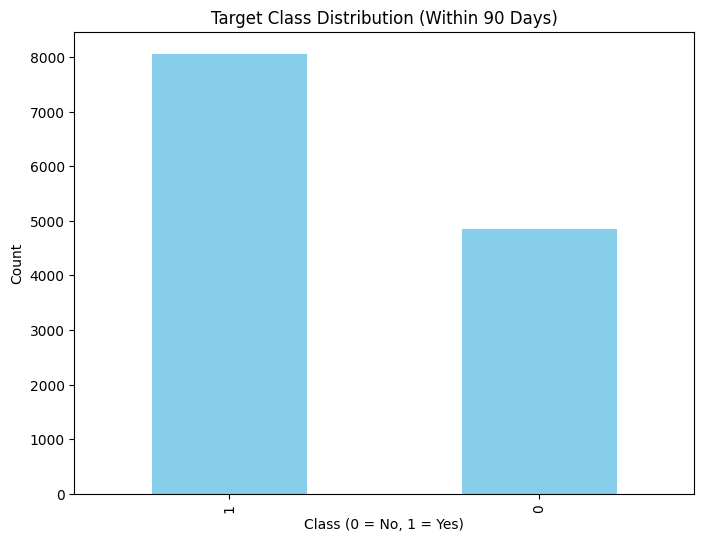


Outliers Summary:
{'patient_id': 0, 'patient_zip3': 0, 'patient_age': 44, 'bmi': 2, 'population': 192, 'density': 1092, 'age_median': 62, 'age_under_10': 171, 'age_10_to_19': 254, 'age_20s': 391, 'age_30s': 375, 'age_40s': 141, 'age_50s': 131, 'age_60s': 222, 'age_70s': 316, 'age_over_80': 470, 'male': 549, 'female': 549, 'married': 153, 'divorced': 26, 'never_married': 26, 'widowed': 319, 'family_size': 142, 'family_dual_income': 94, 'income_household_median': 703, 'income_household_under_5': 299, 'income_household_5_to_10': 555, 'income_household_10_to_15': 301, 'income_household_15_to_20': 441, 'income_household_20_to_25': 240, 'income_household_25_to_35': 87, 'income_household_35_to_50': 114, 'income_household_50_to_75': 455, 'income_household_75_to_100': 60, 'income_household_100_to_150': 22, 'income_household_150_over': 374, 'income_household_six_figure': 138, 'income_individual_median': 630, 'home_ownership': 129, 'housing_units': 195, 'home_value': 1148, 'rent_median': 72, 're

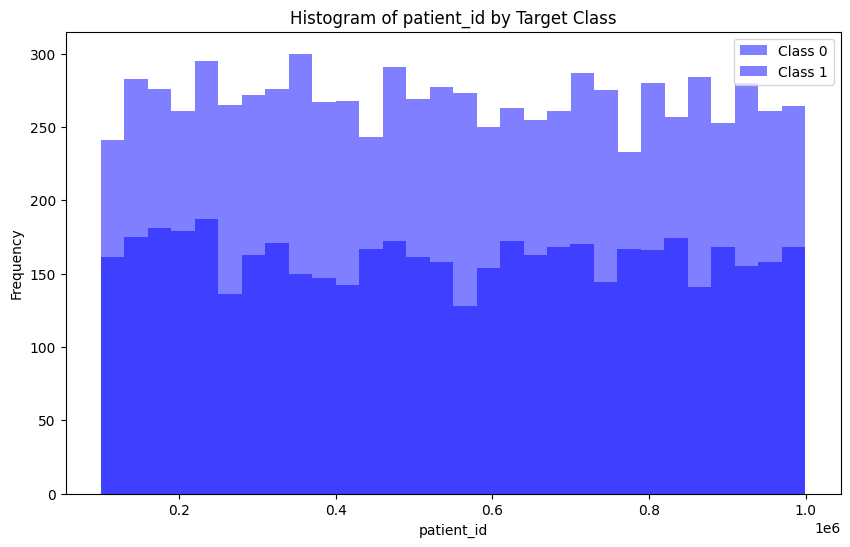

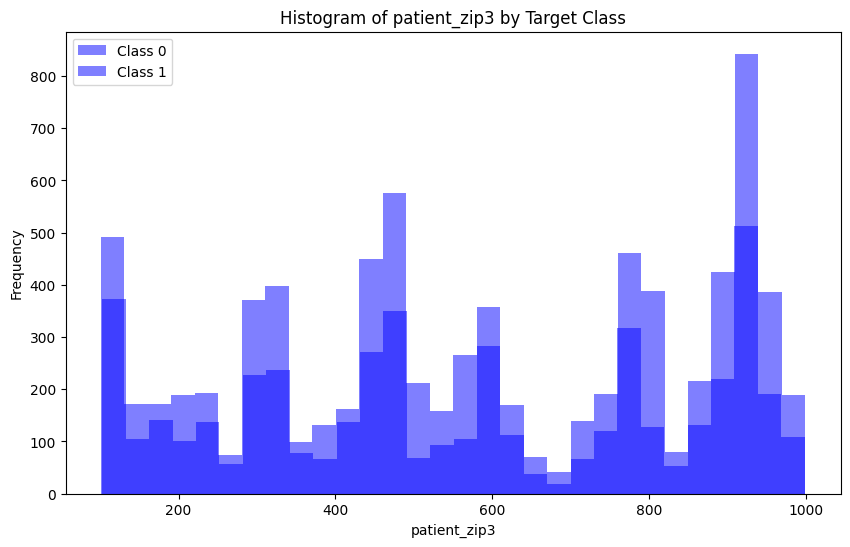

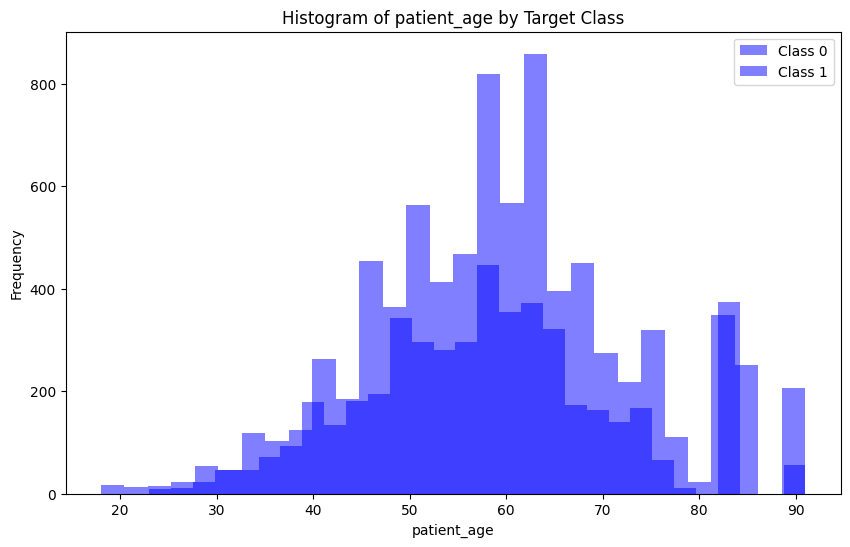

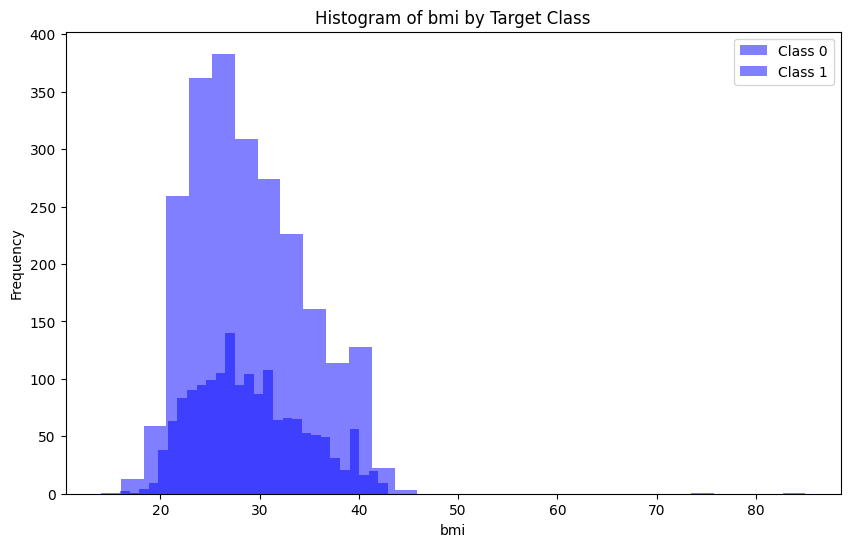

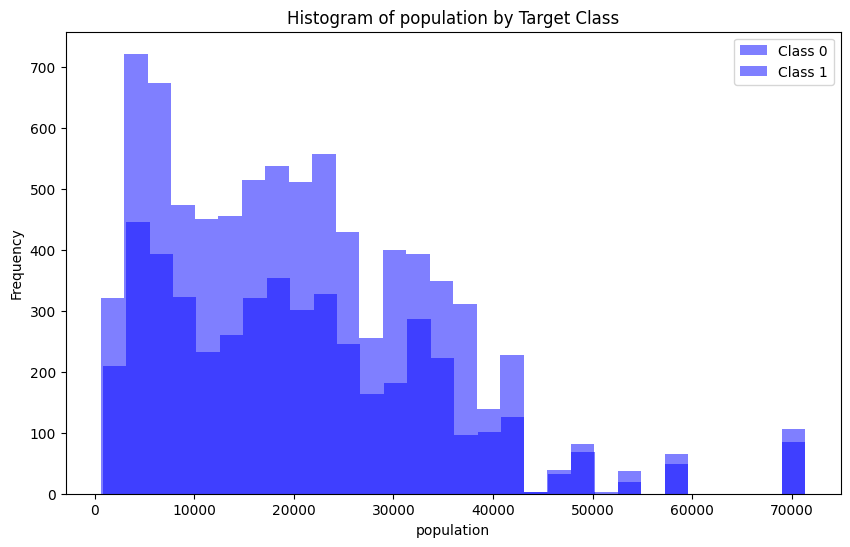

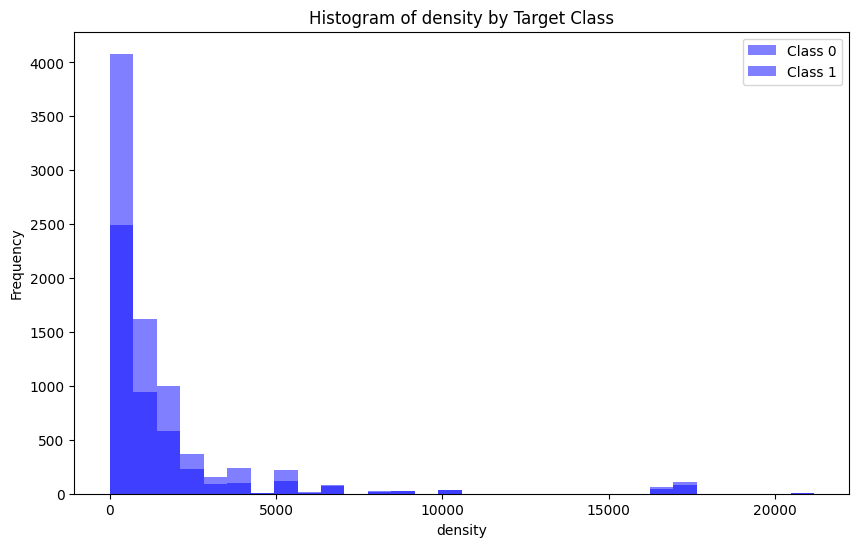

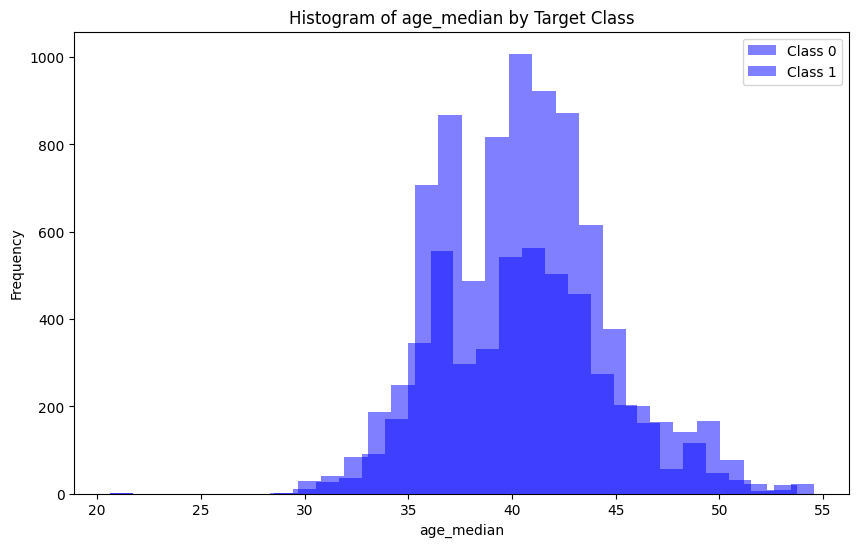

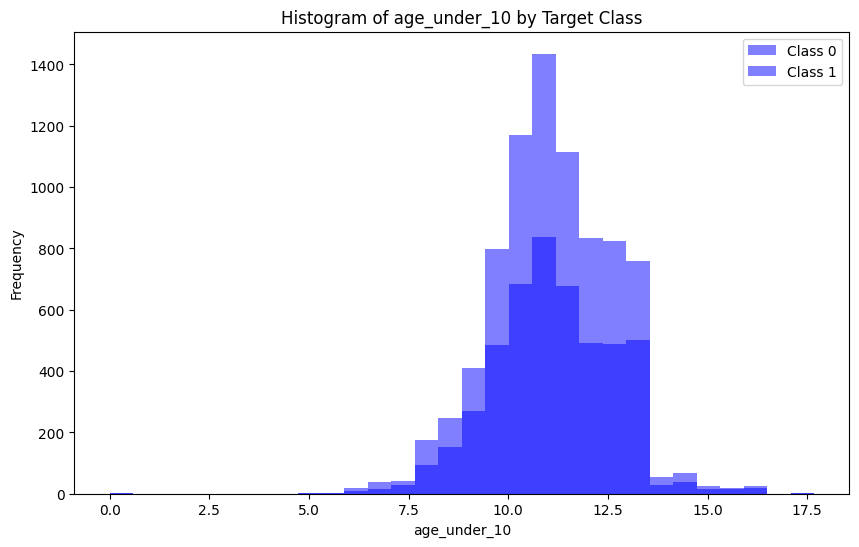

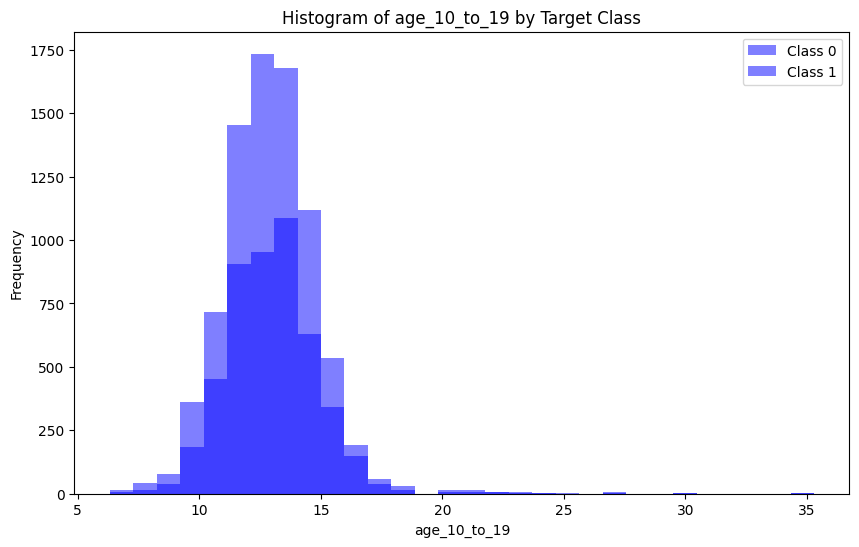

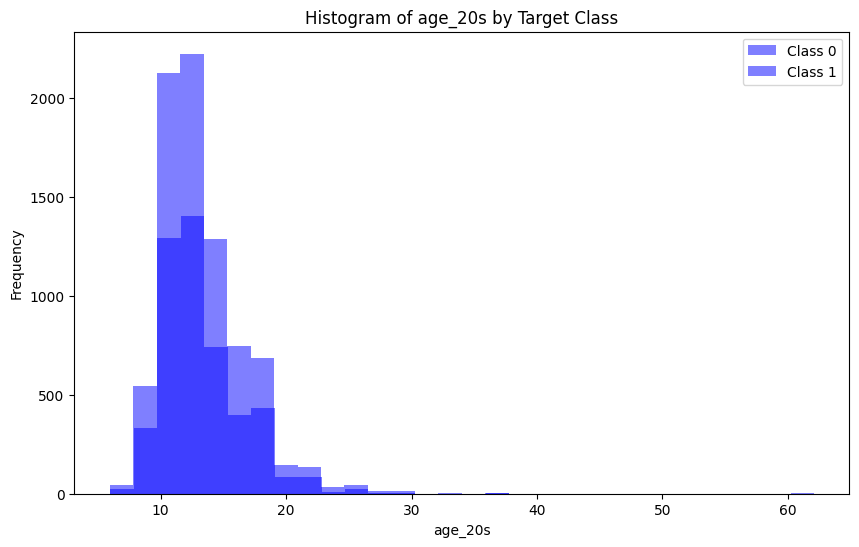

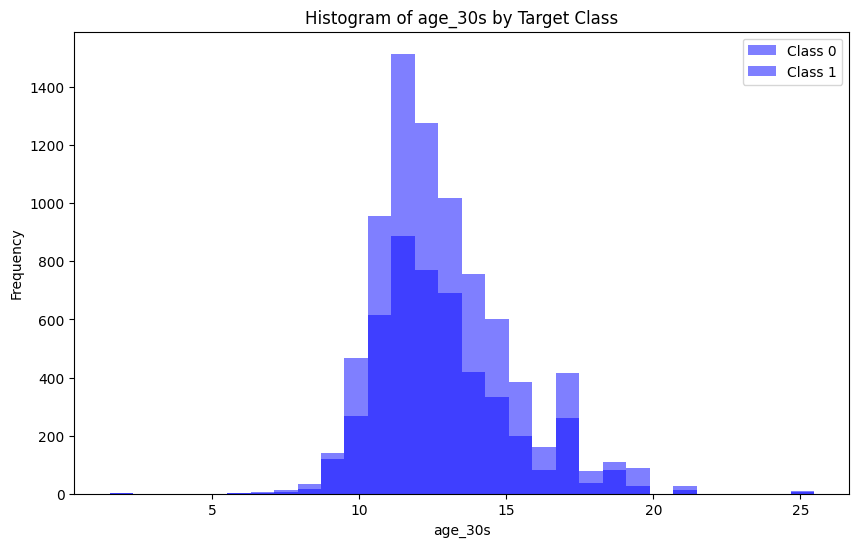

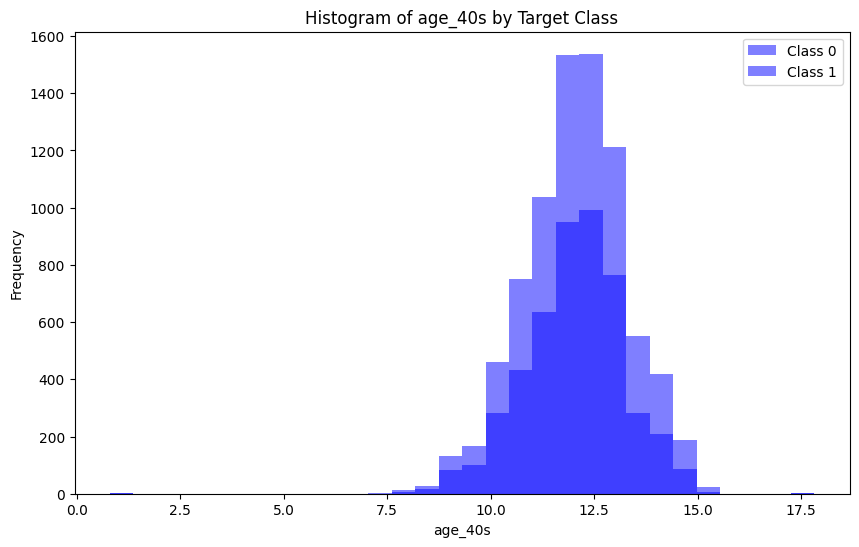

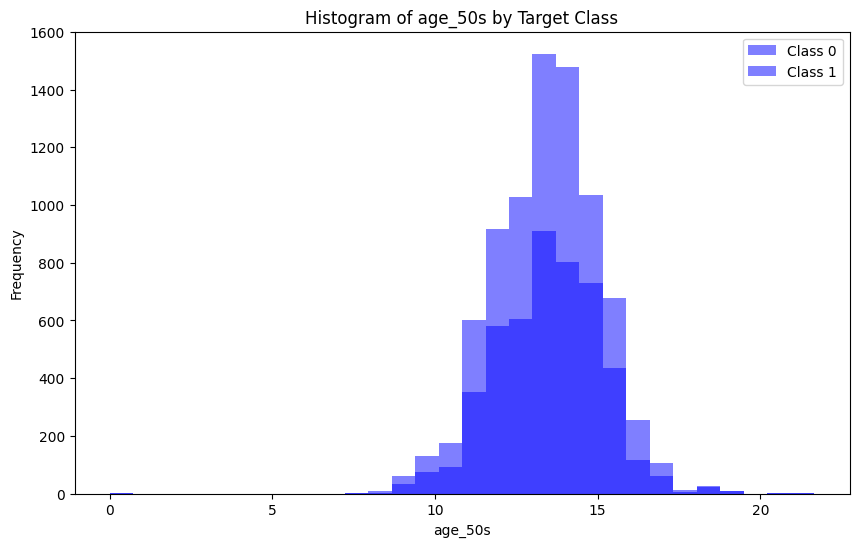

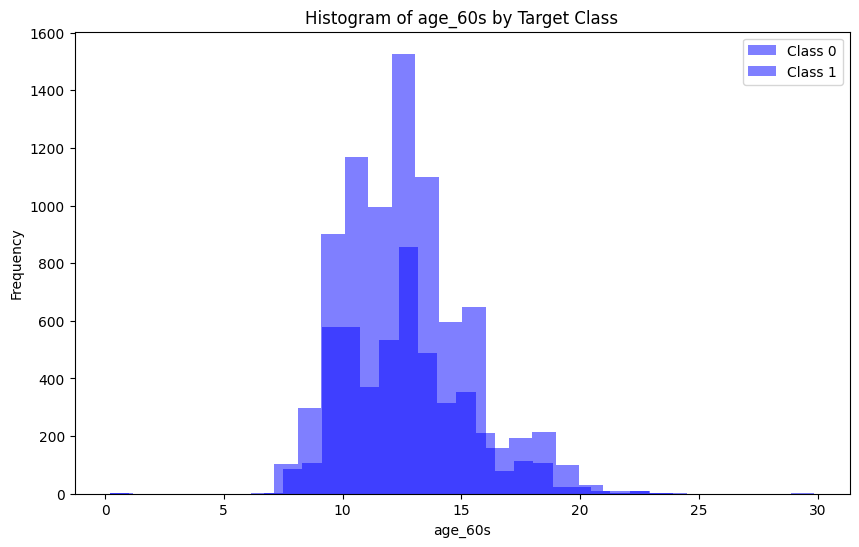

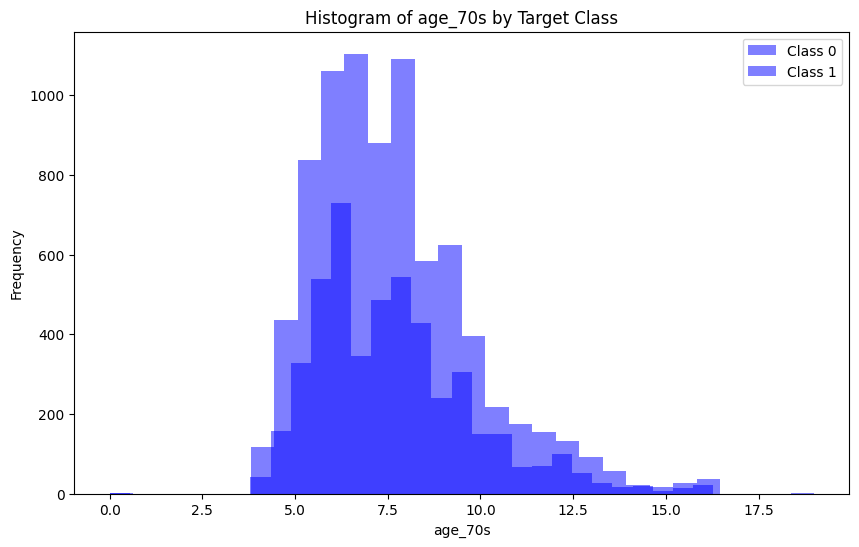

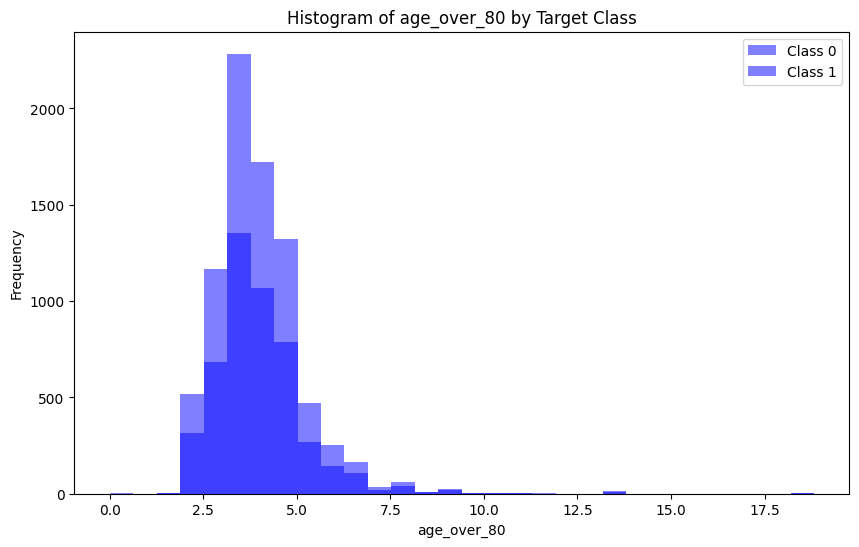

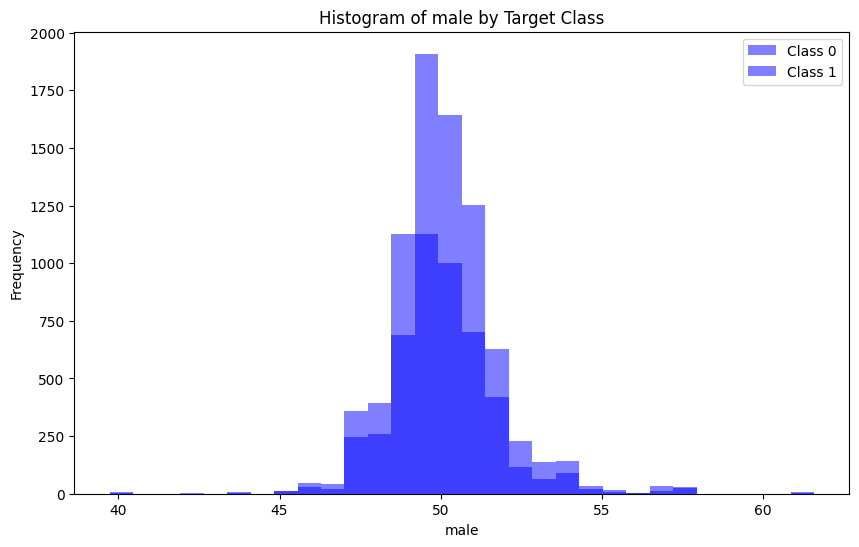

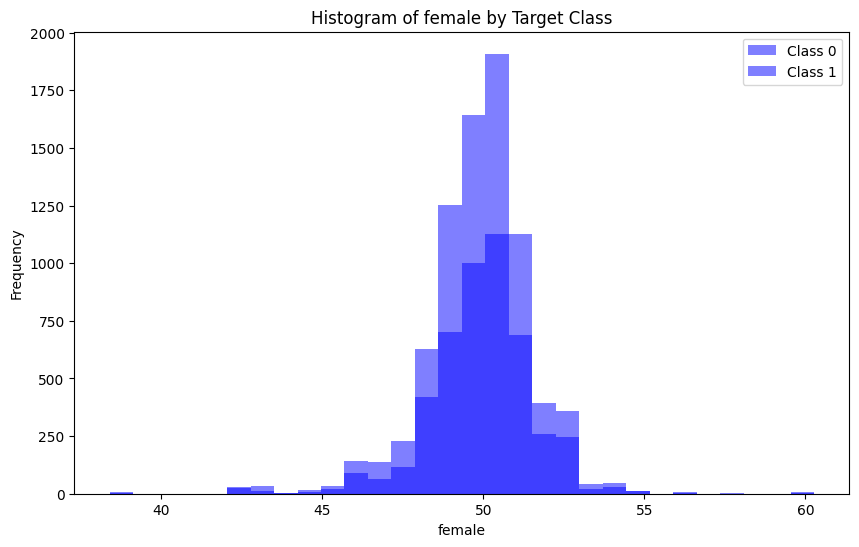

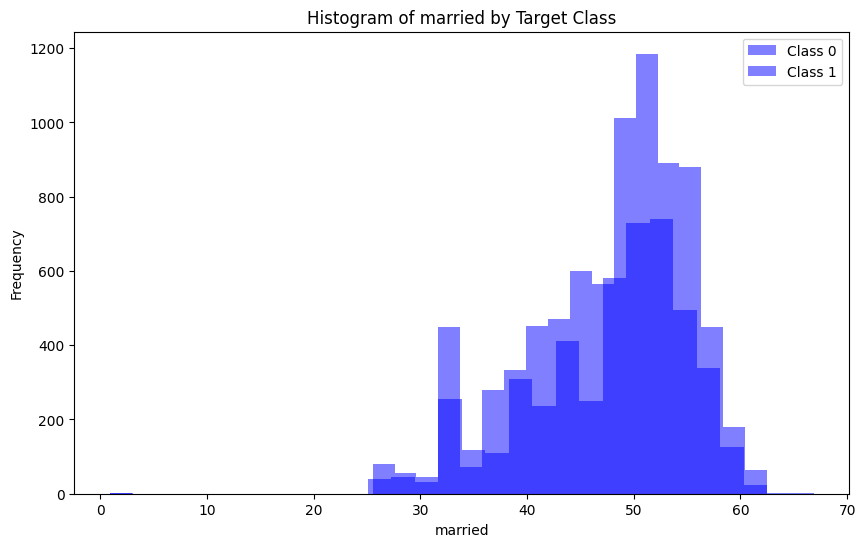

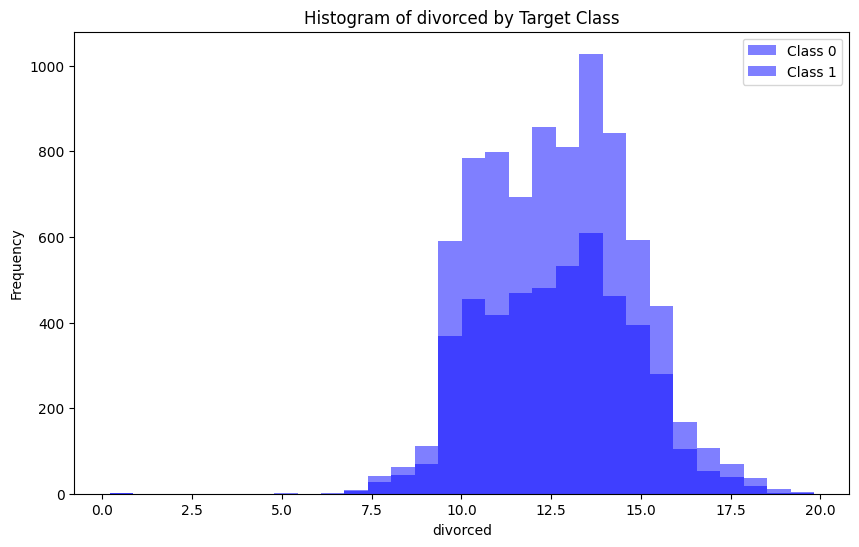

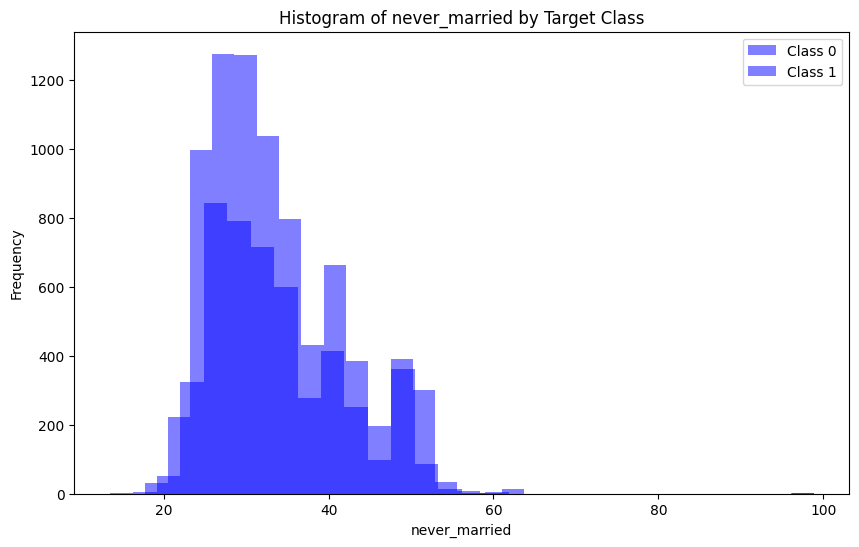

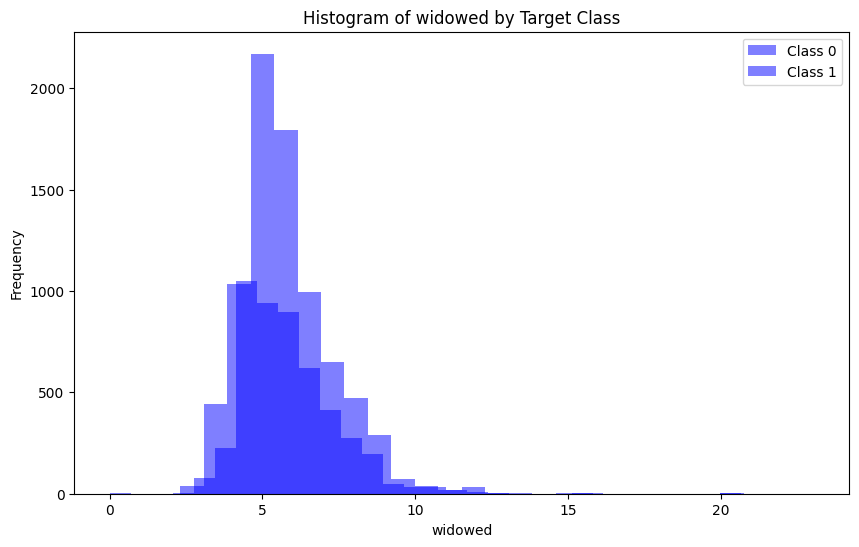

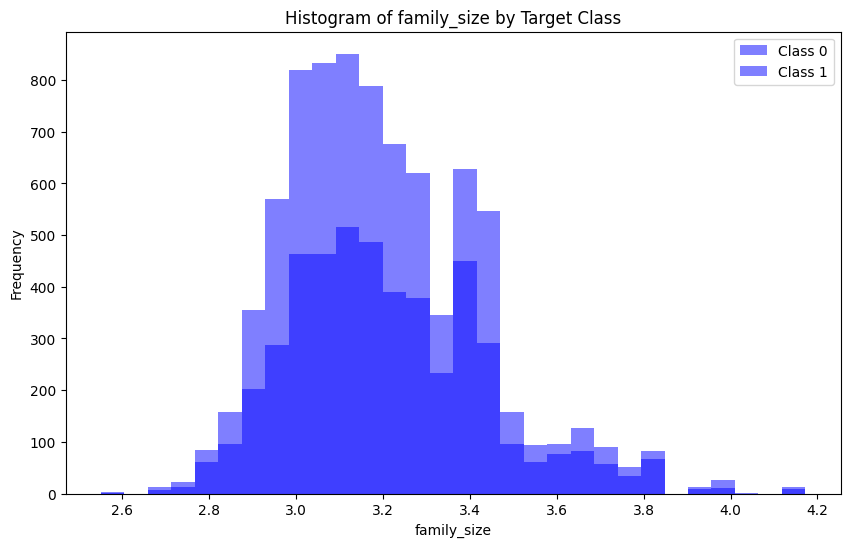

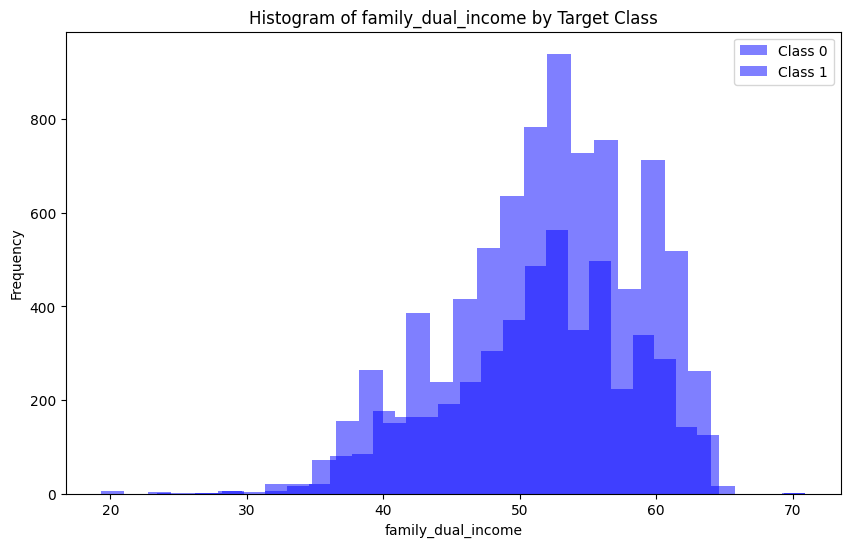

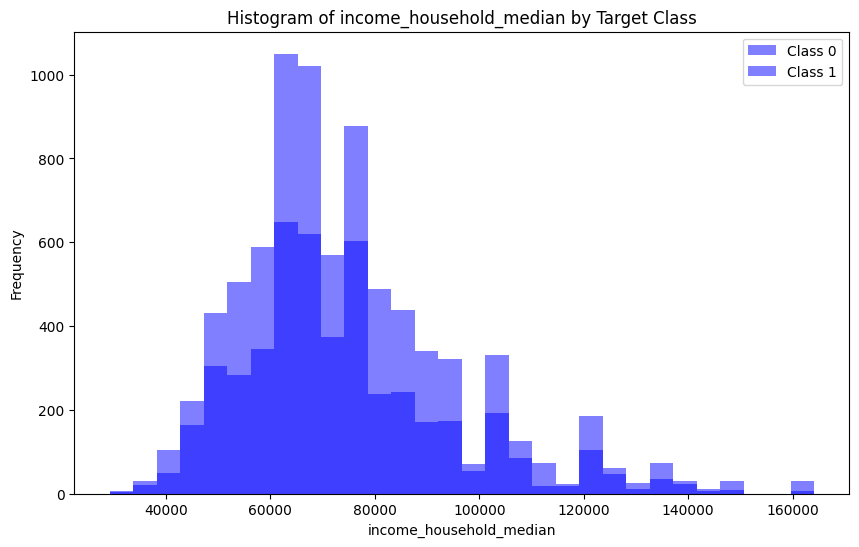

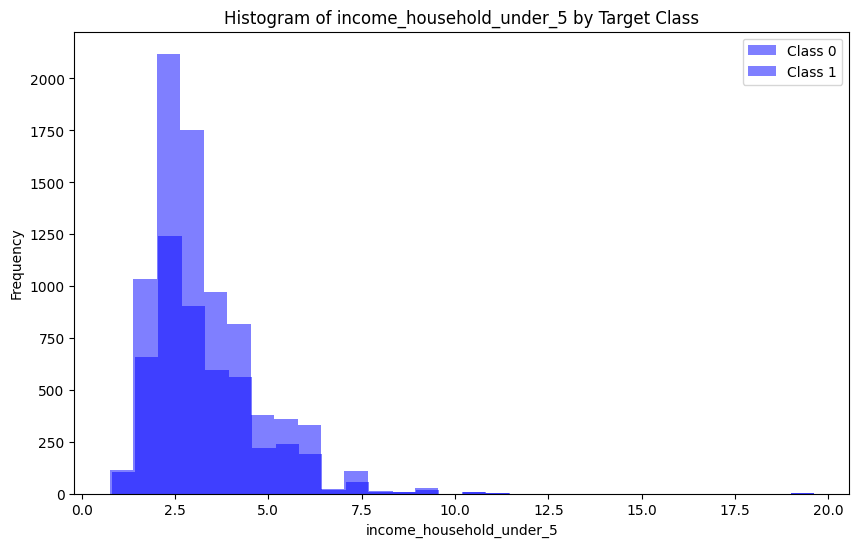

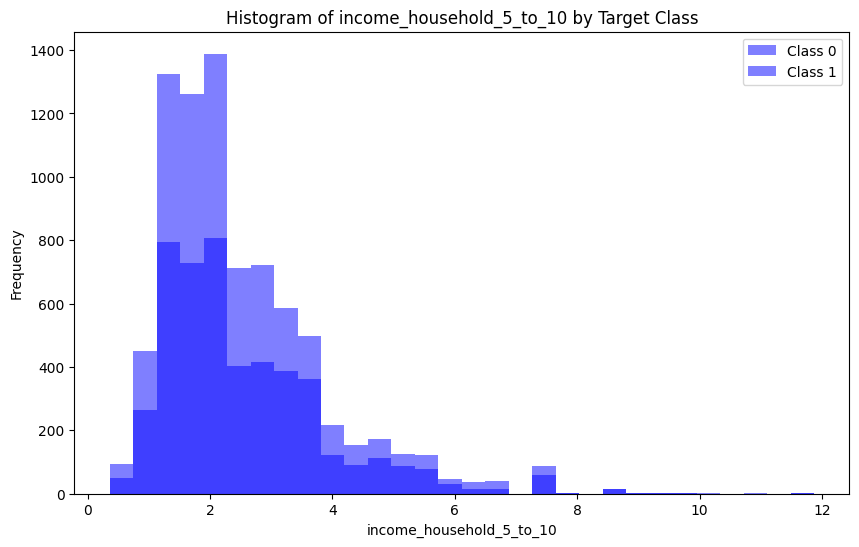

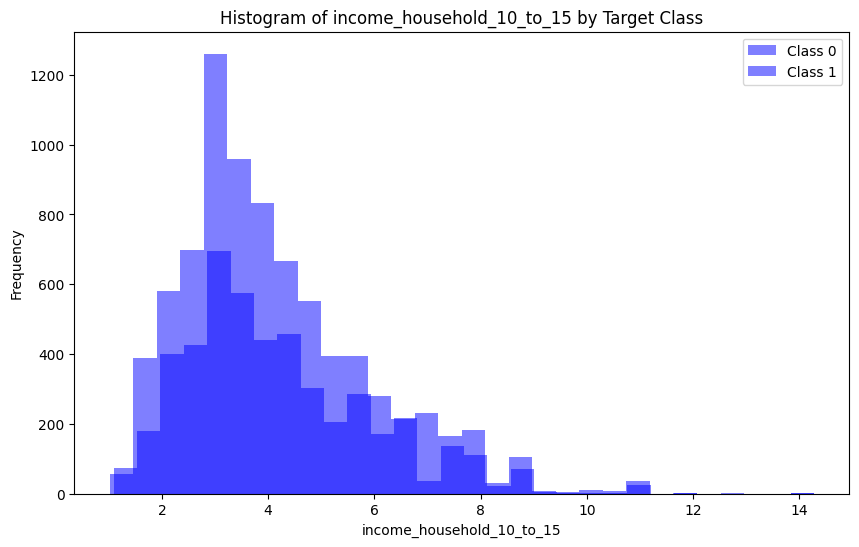

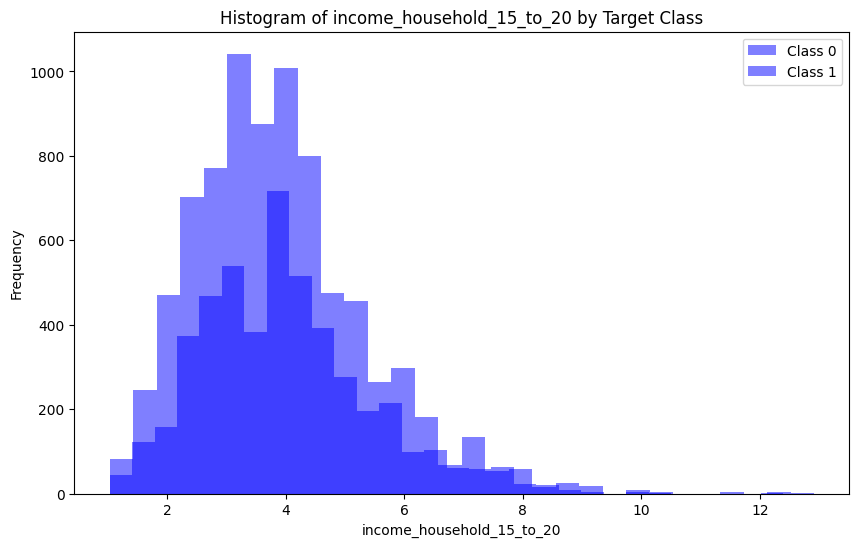

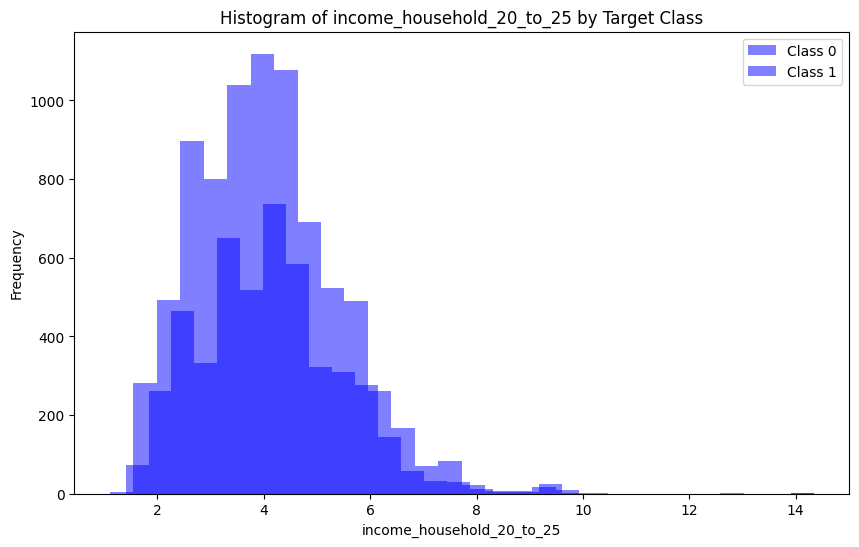

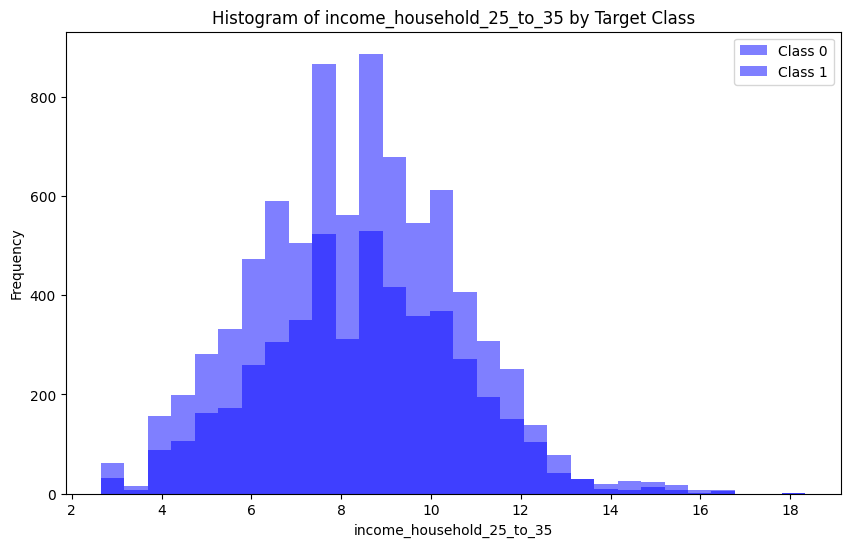

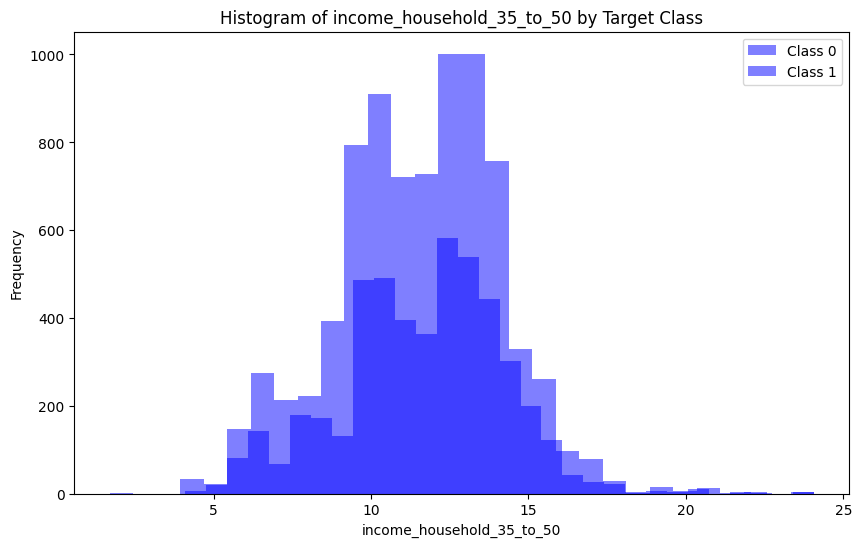

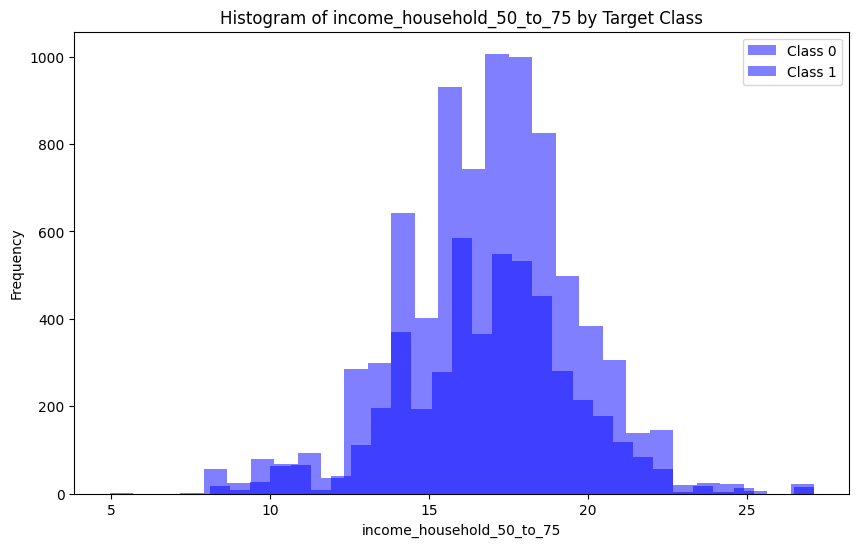

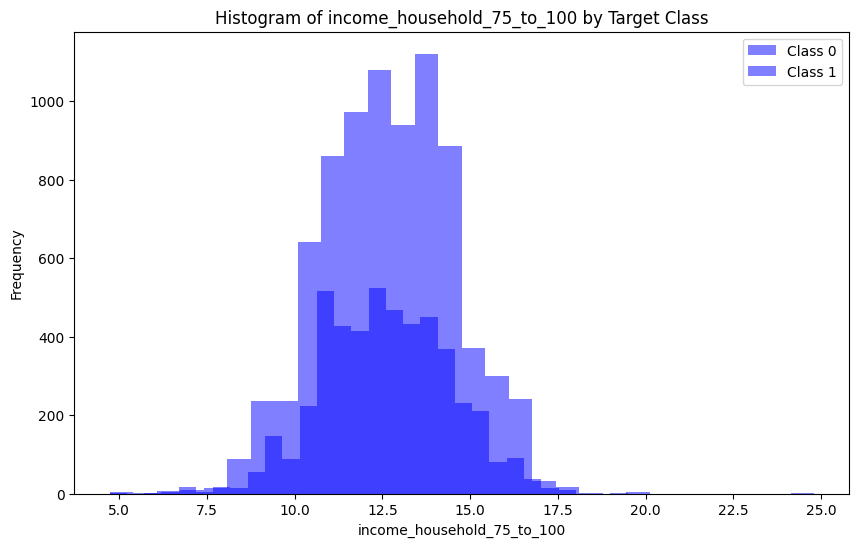

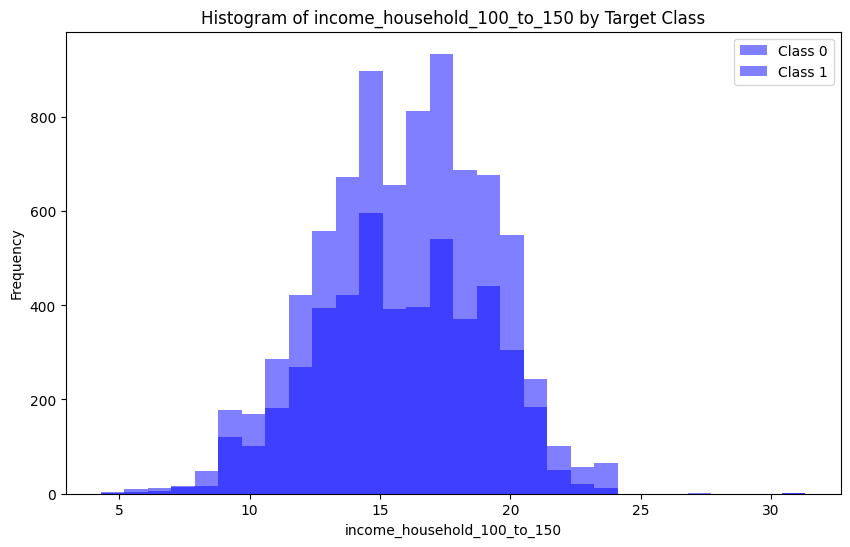

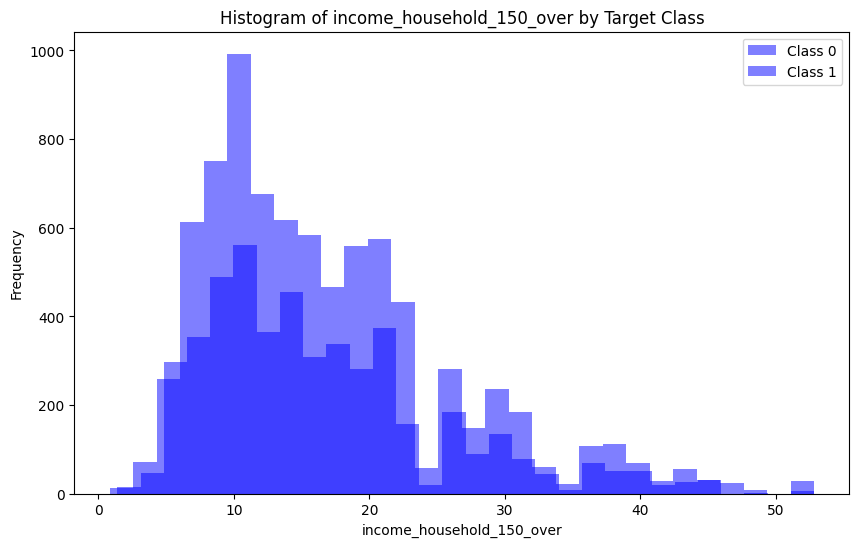

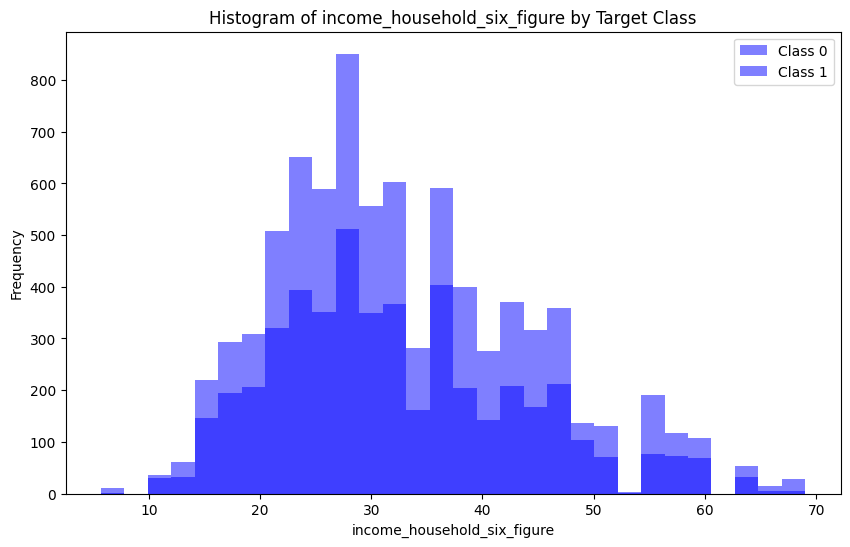

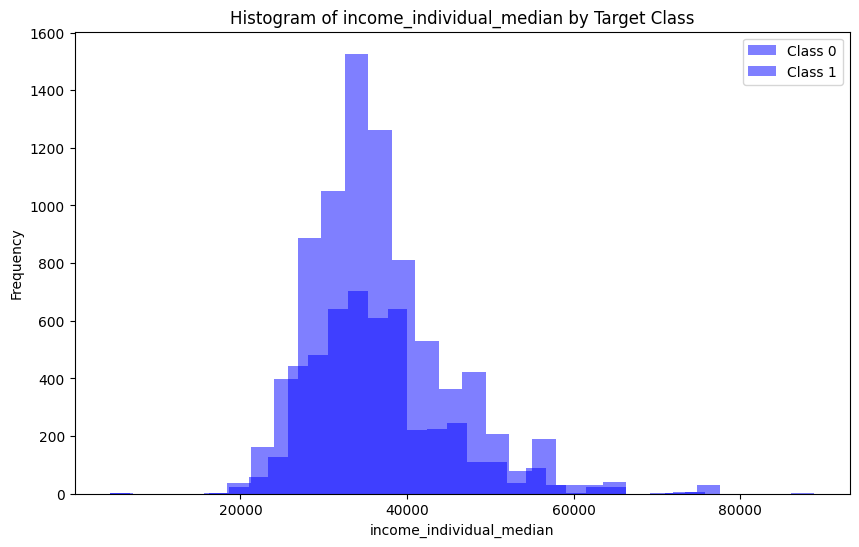

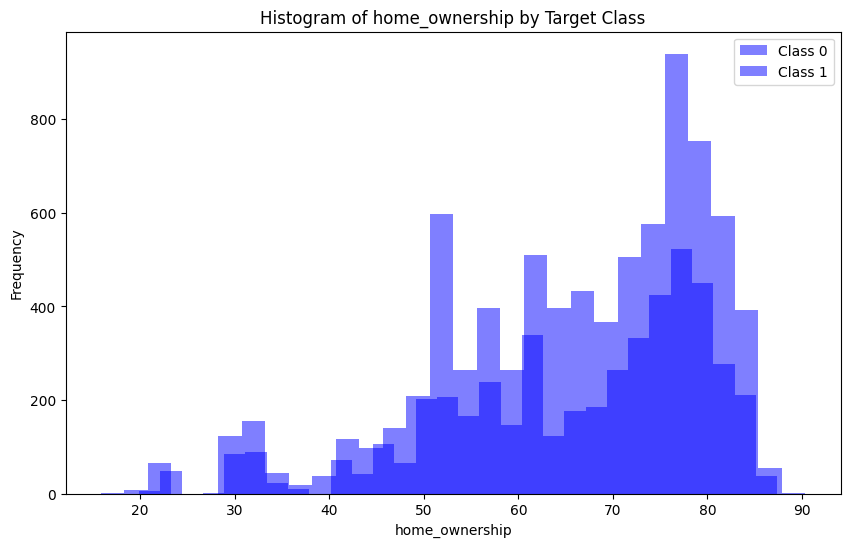

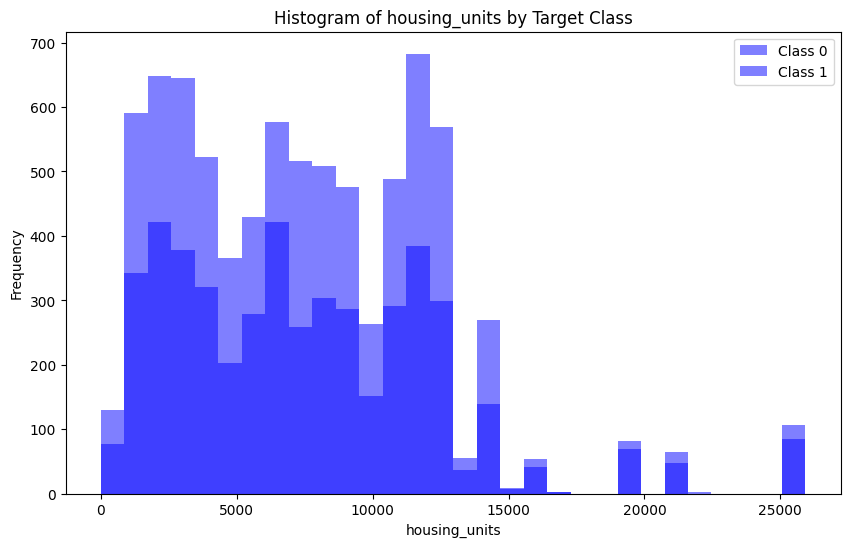

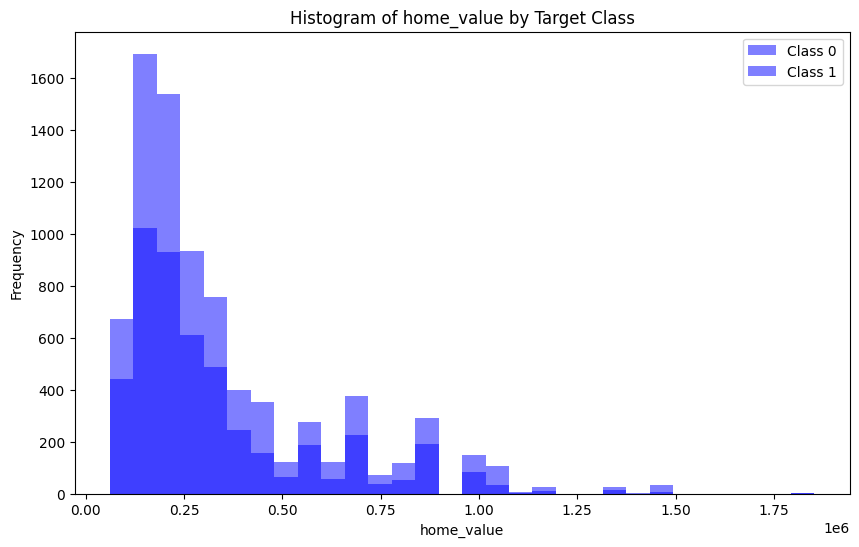

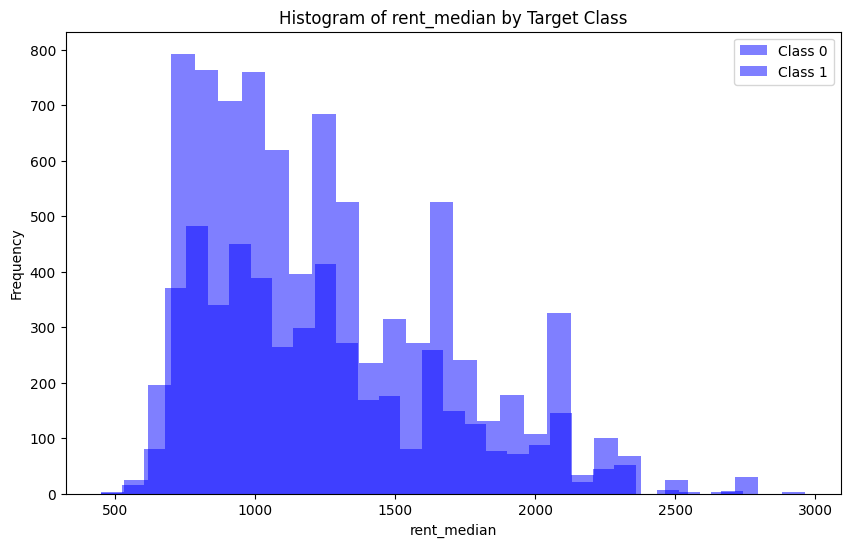

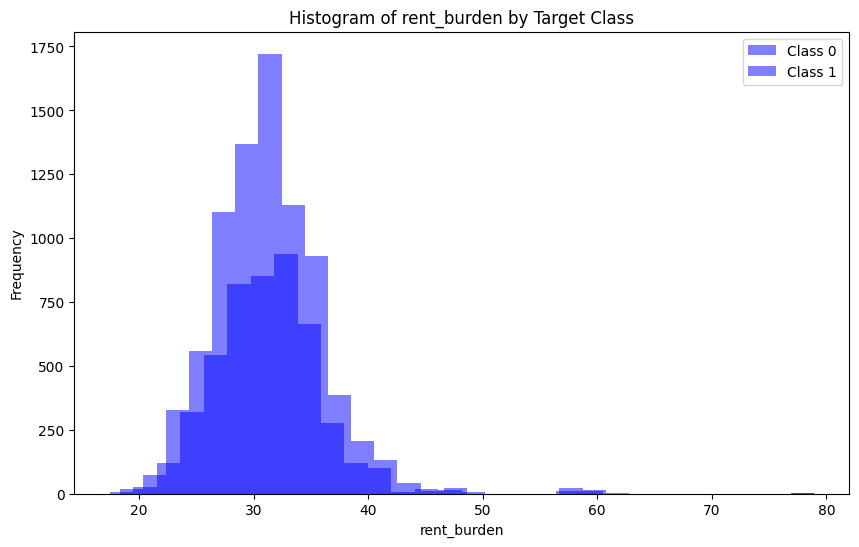

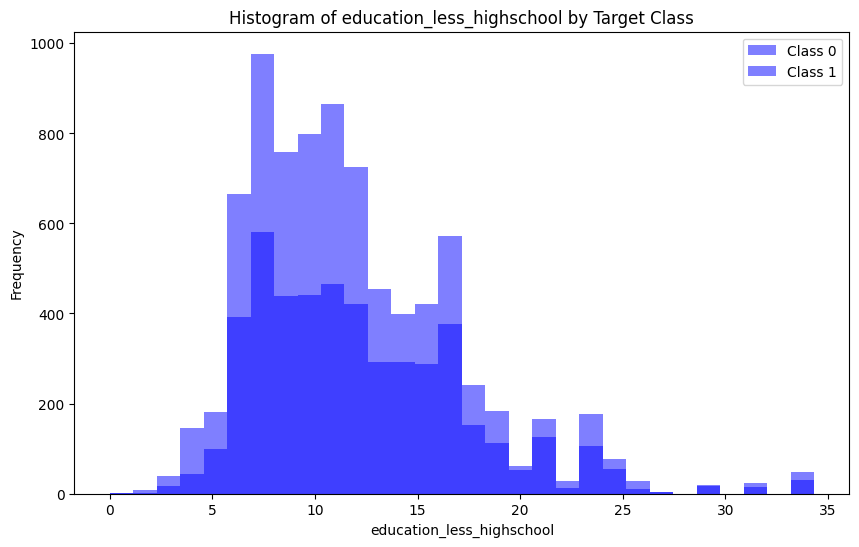

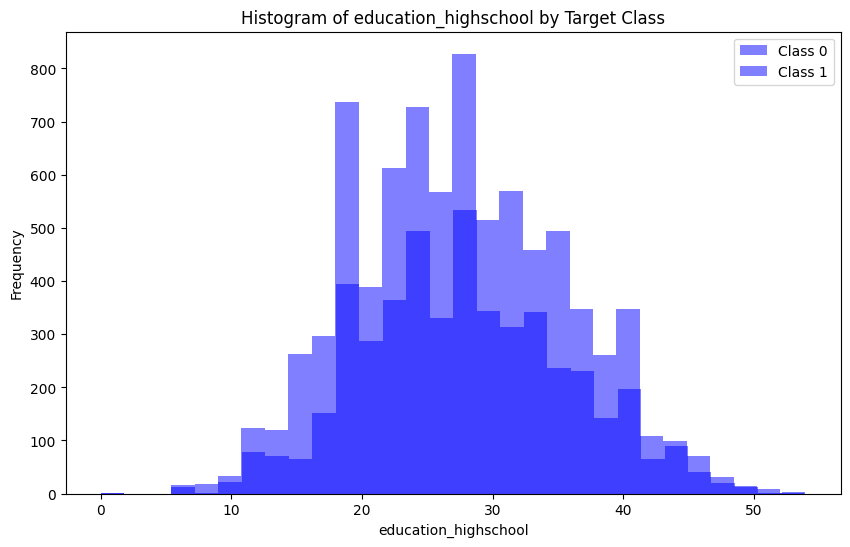

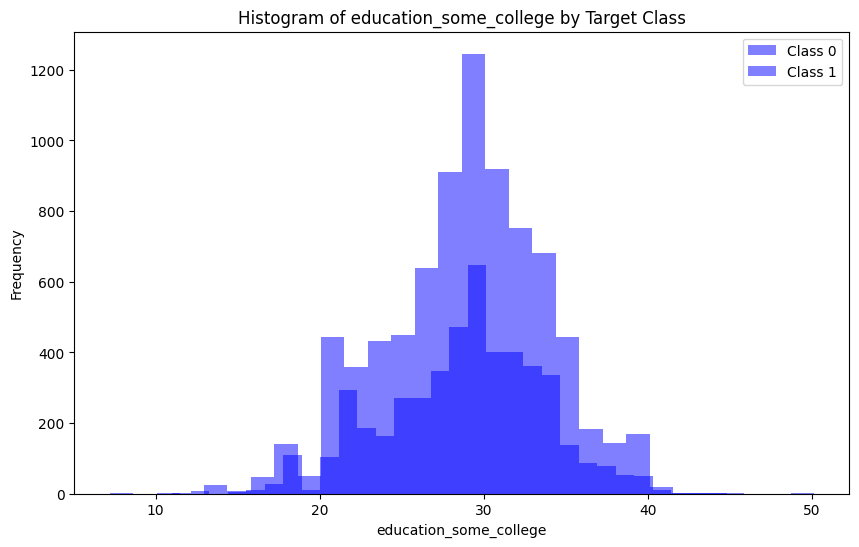

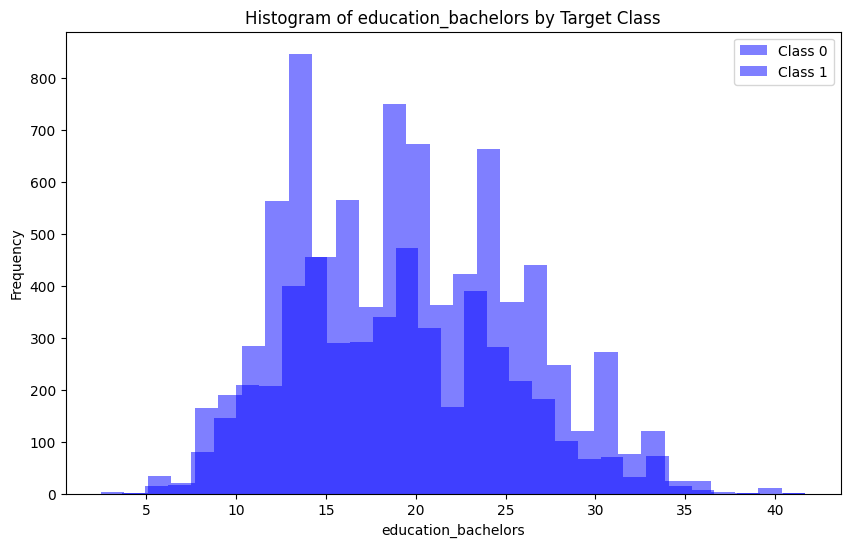

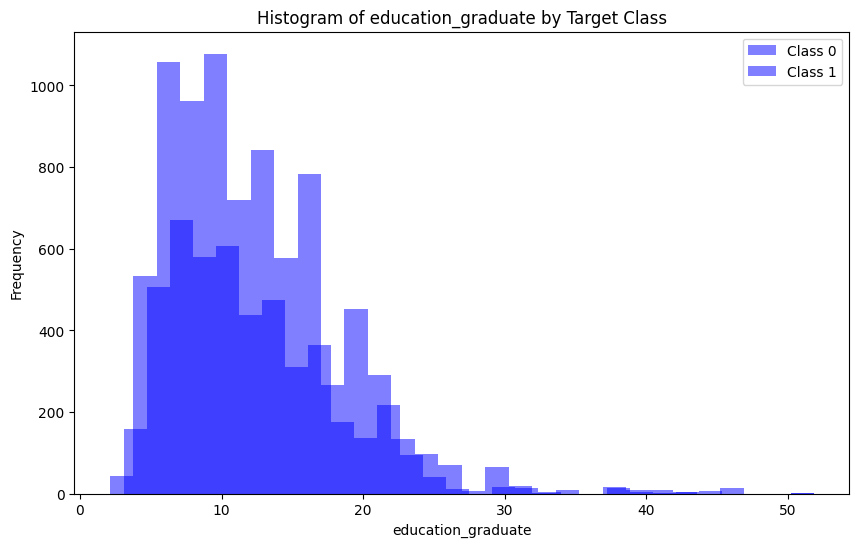

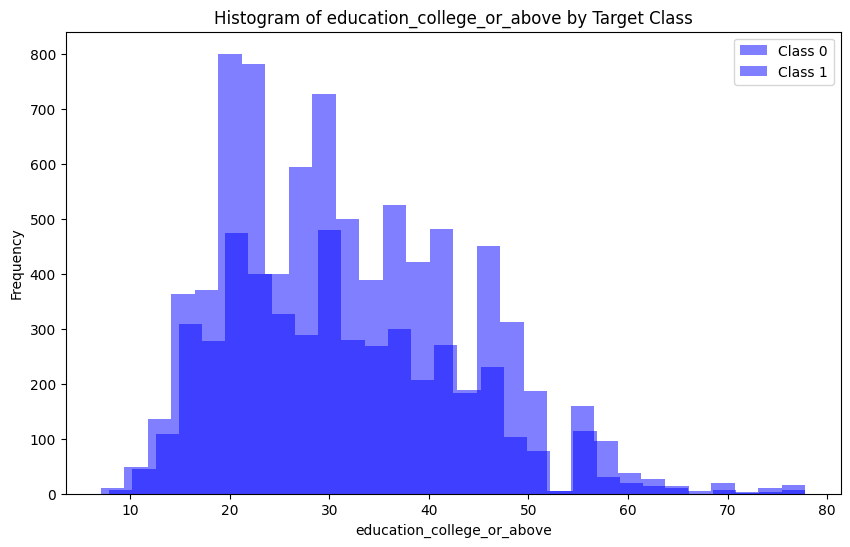

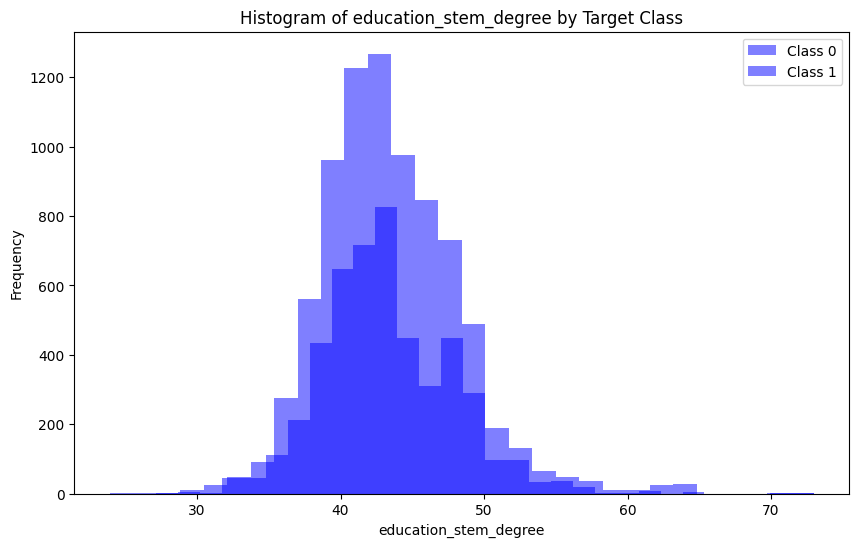

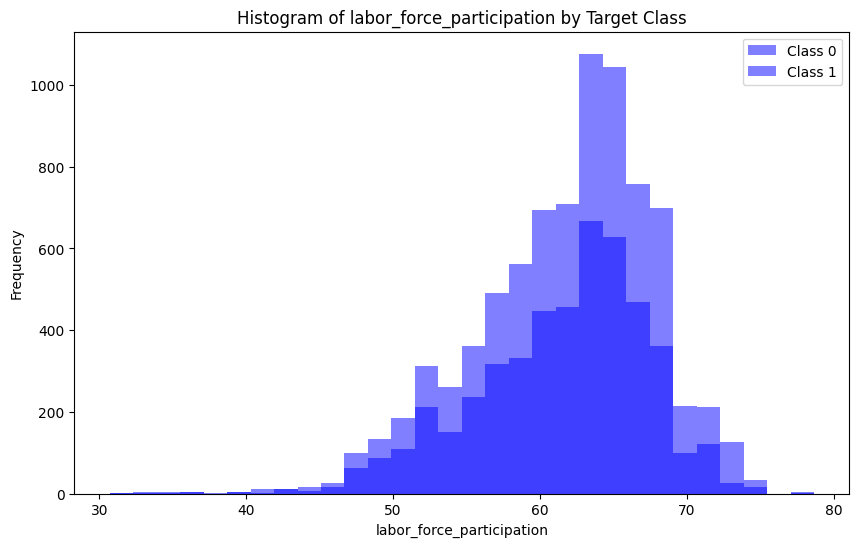

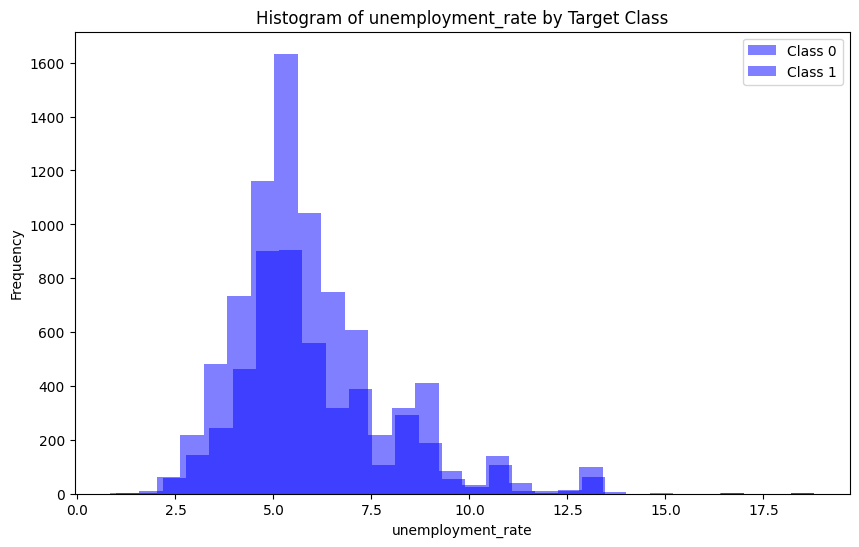

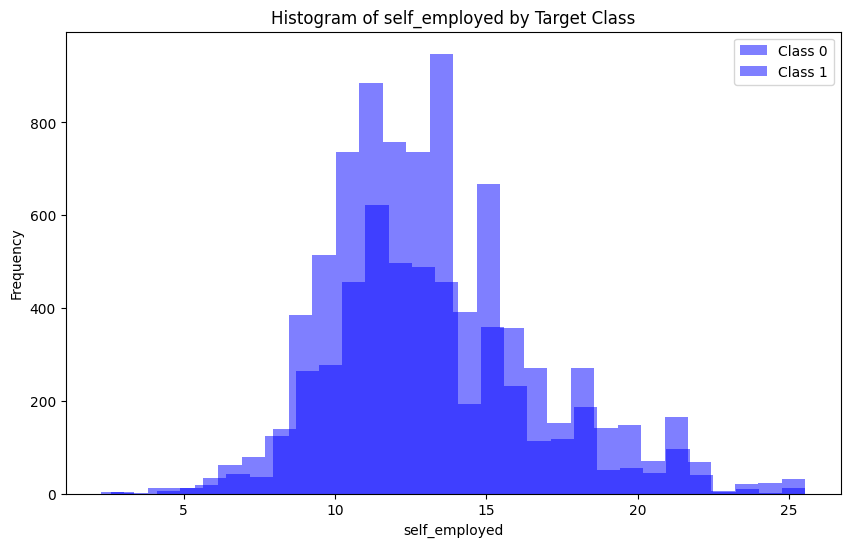

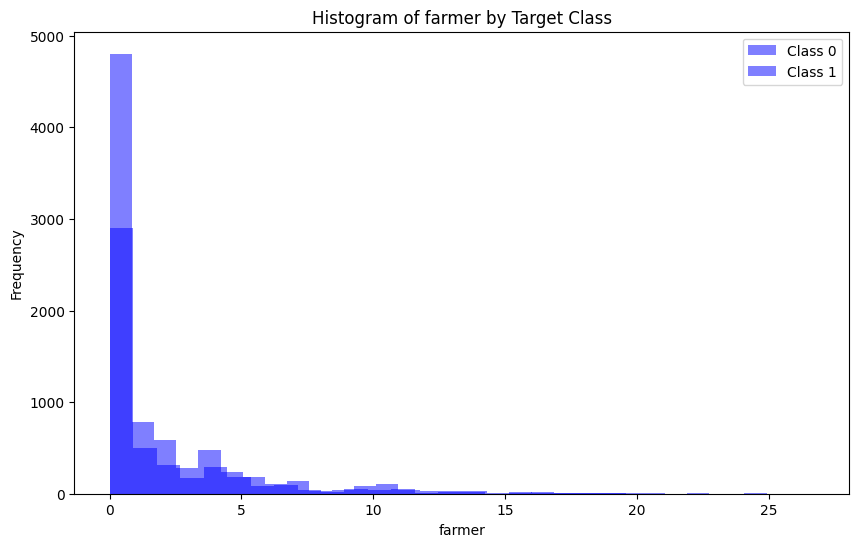

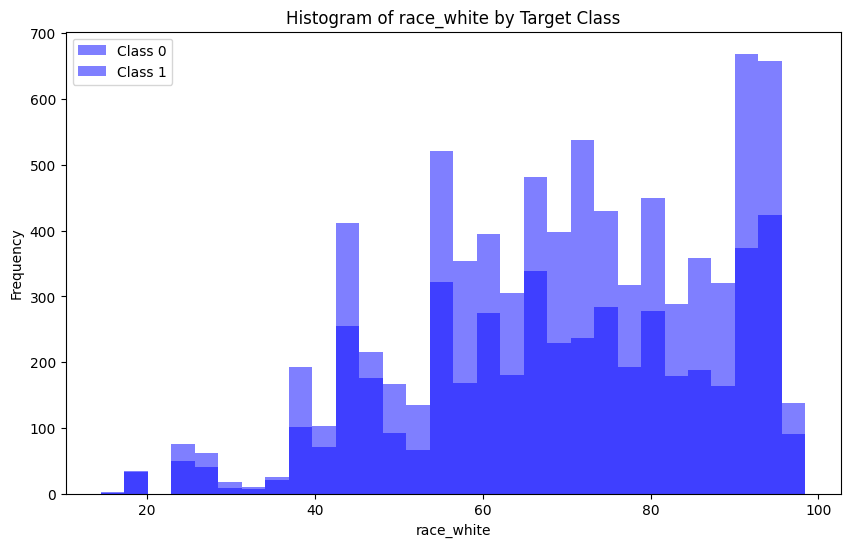

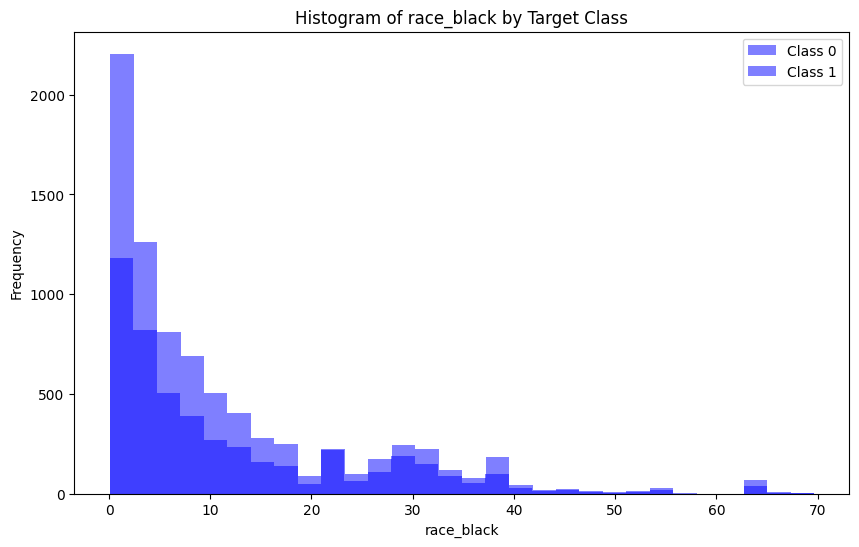

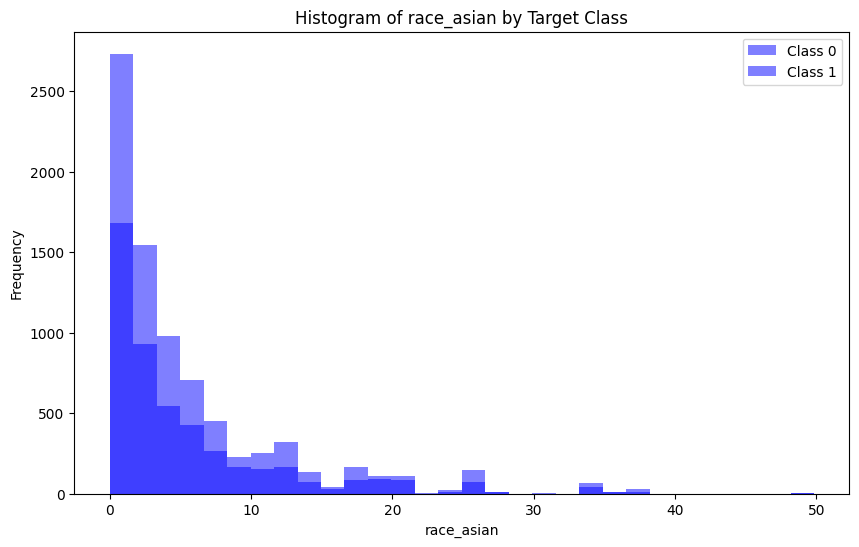

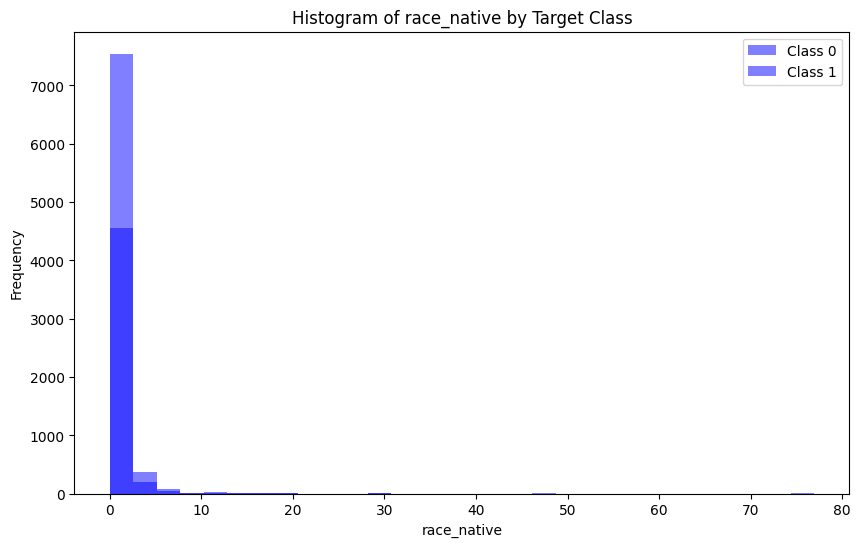

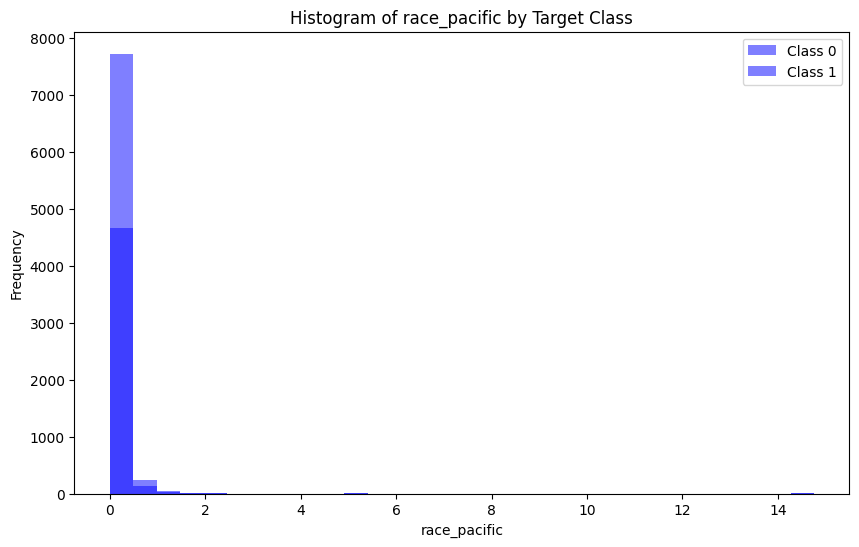

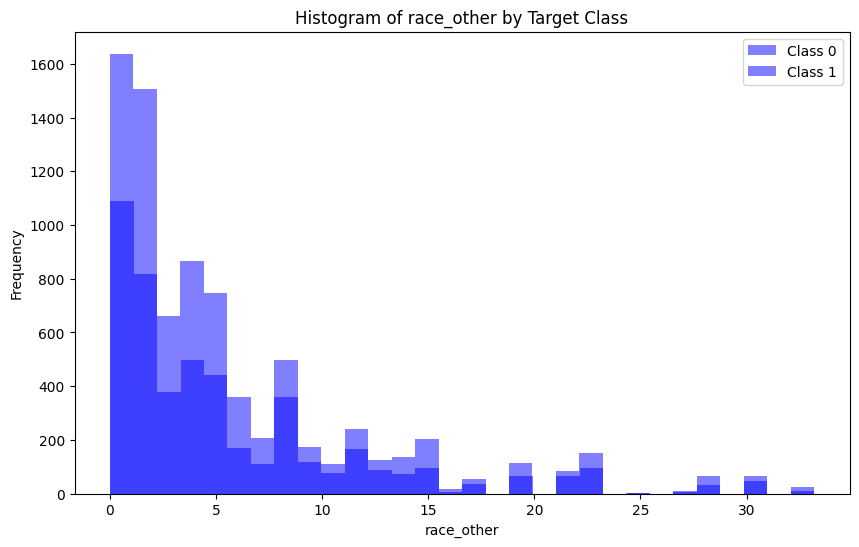

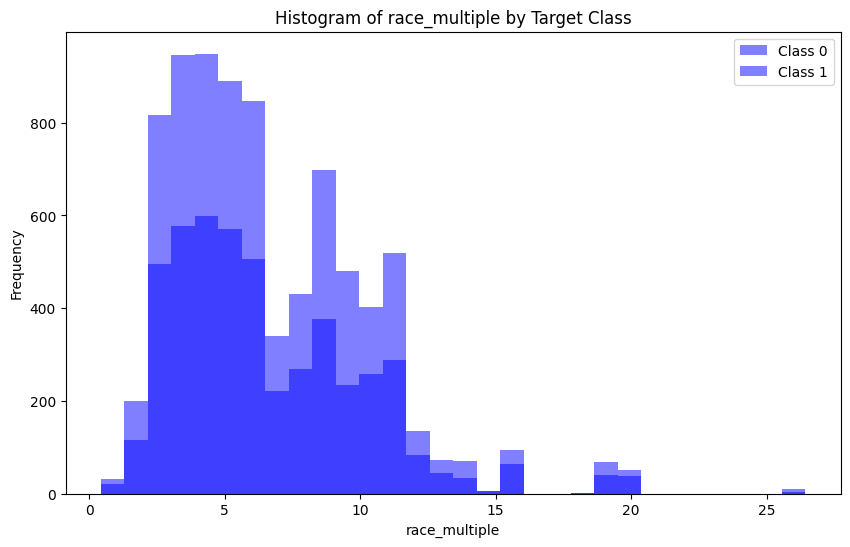

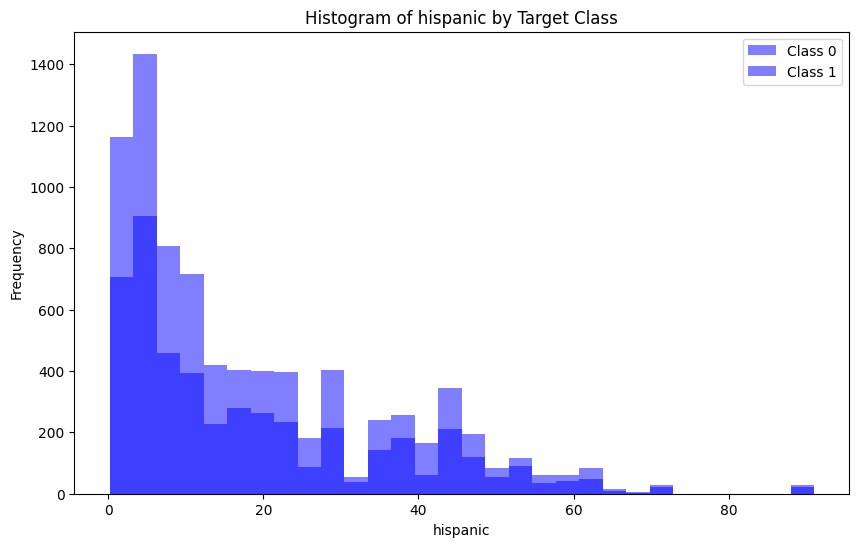

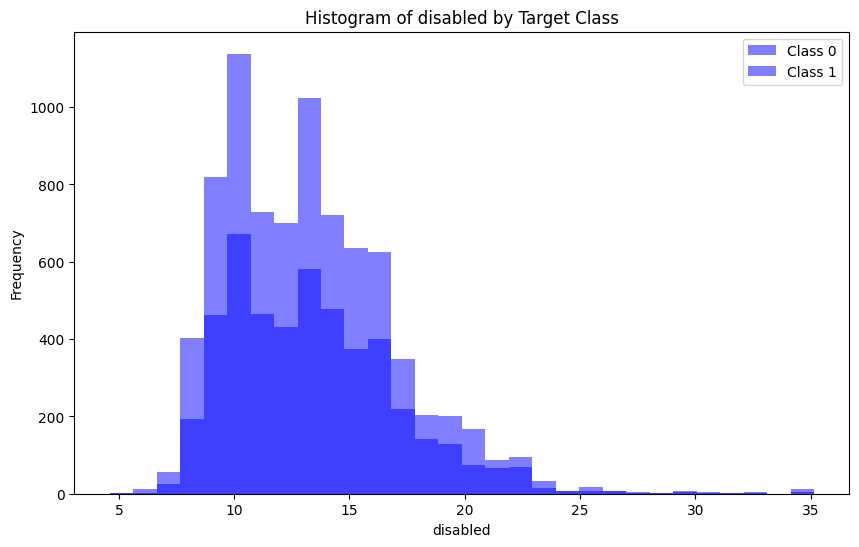

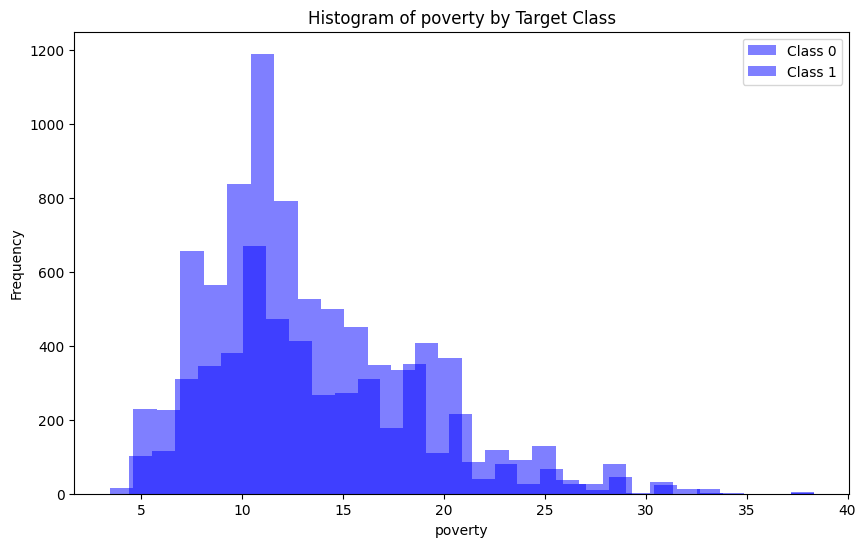

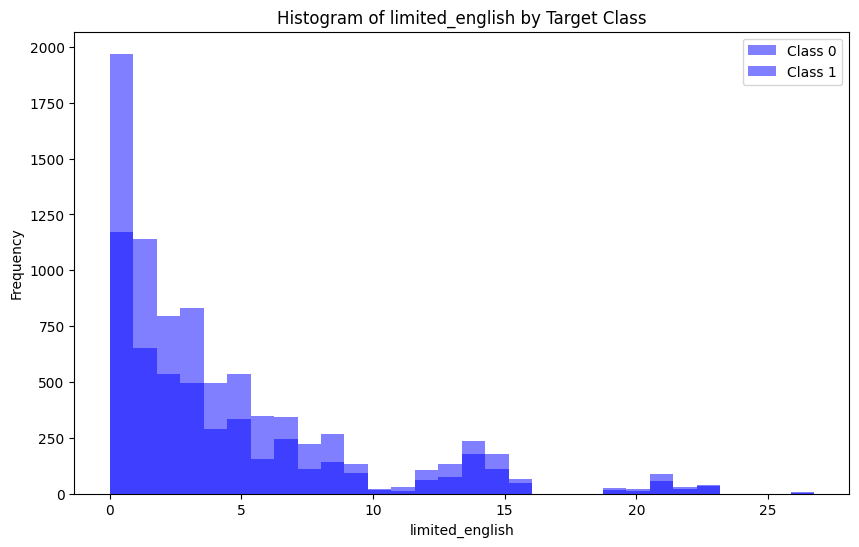

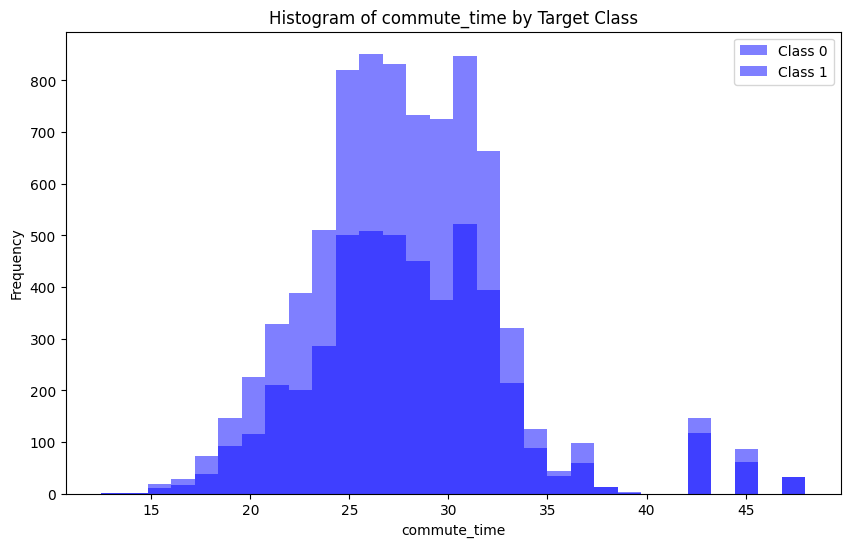

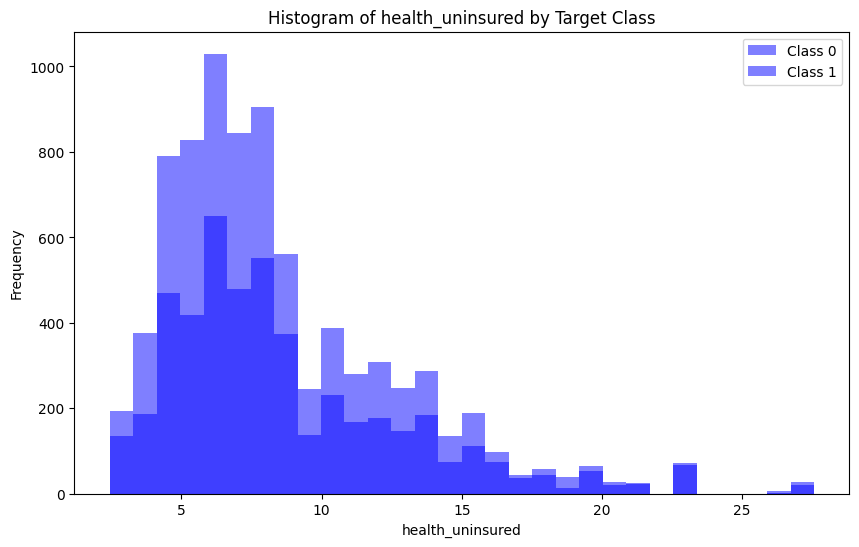

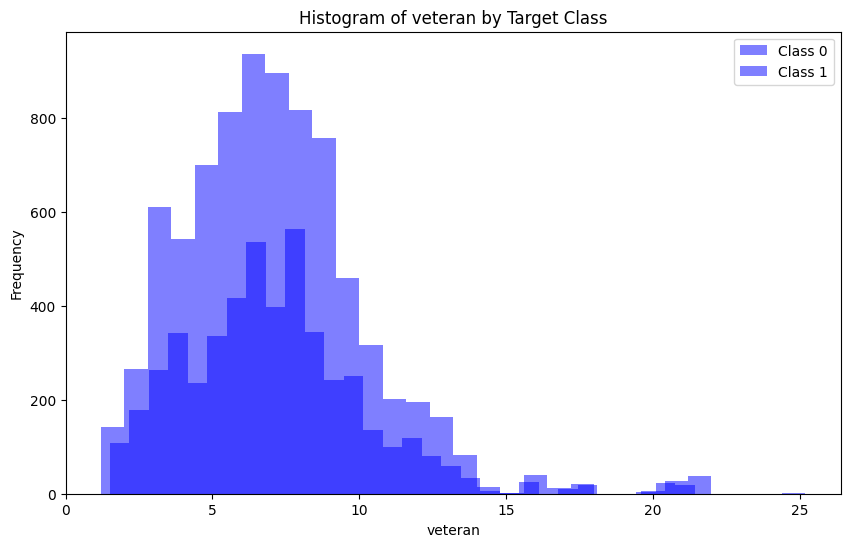

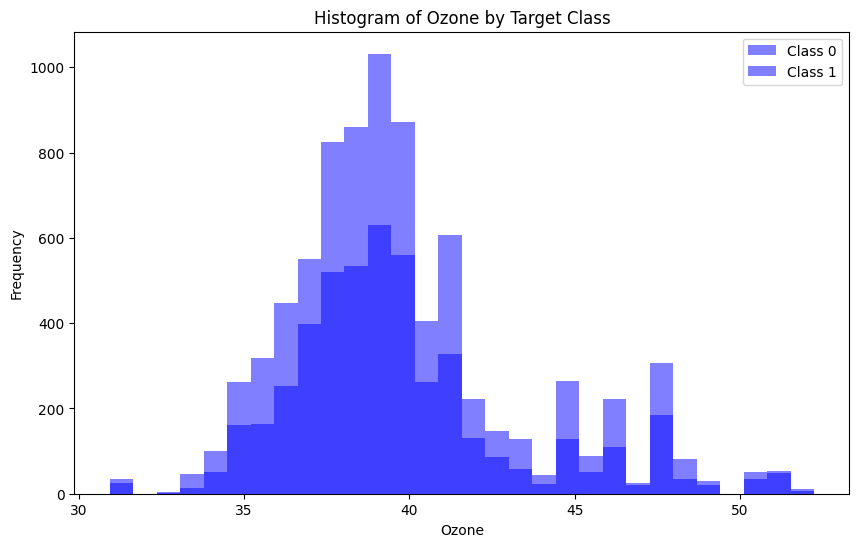

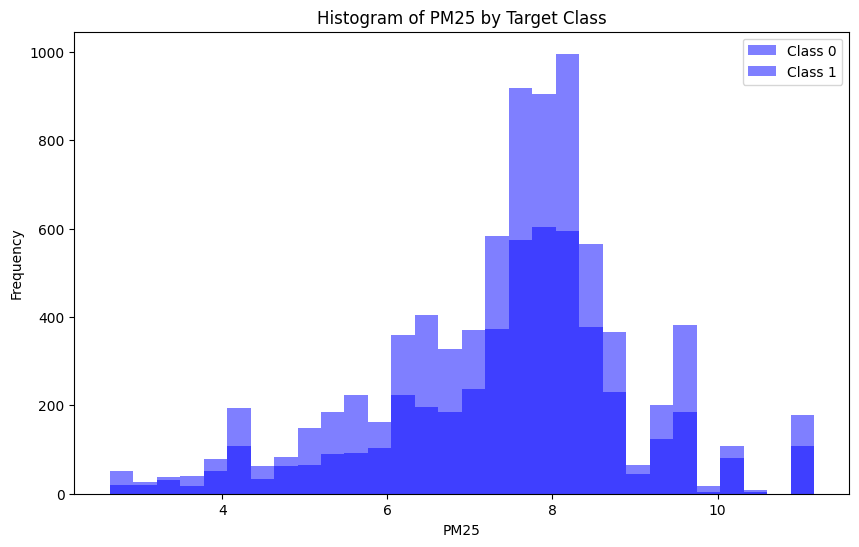

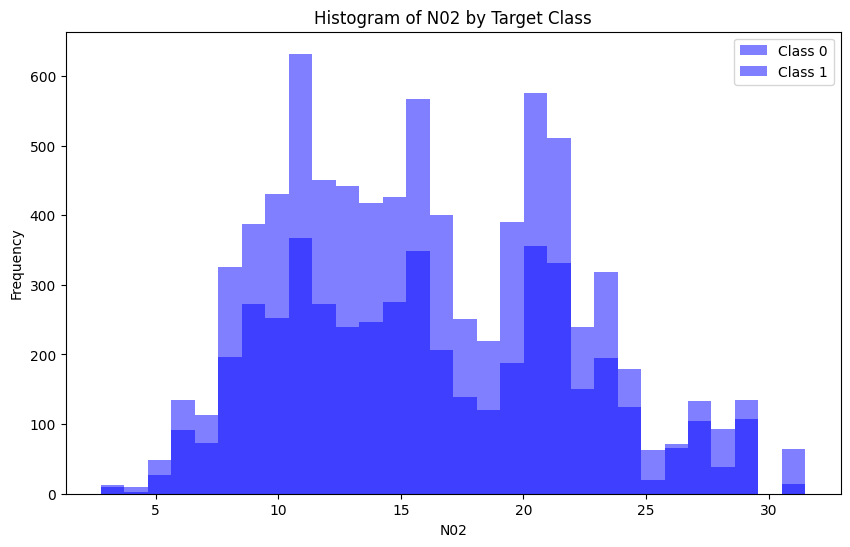

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_data = pd.read_csv('training.csv.zip')

# Identify categorical and numerical features
categorical_features = train_data.select_dtypes(include=['object']).columns
numerical_features = train_data.select_dtypes(include=['float64', 'int64']).columns

print("\nCategorical Features:")
print(categorical_features)

print("\nNumerical Features:")
print(numerical_features)

feature_summary = []
for column in train_data.columns:
    feature_type = 'Categorical' if column in categorical_features else 'Numerical'
    unique_values = train_data[column].unique()[:5]  # Show first 5 unique values
    unique_summary = unique_values if feature_type == 'Categorical' else f"Range: {train_data[column].min()} to {train_data[column].max()}"
    missing_count = train_data[column].isnull().sum()
    feature_summary.append({
        'Feature': column,
        'Type': feature_type,
        'Unique Values': unique_summary,
        'Missing Values': missing_count
    })
    
feature_summary_df = pd.DataFrame(feature_summary)
print("\nFeature Summary Table:")
print(feature_summary_df)

# Handle Target
if 'DiagPeriodL90D' in train_data.columns:
    # Check unique values in the target
    print("\nTarget Analysis (DiagPeriodL90D):")
    print(f"Unique values in target: {train_data['DiagPeriodL90D'].unique()}")

    # Check class imbalance
    print("\nClass Distribution:")
    print(train_data['DiagPeriodL90D'].value_counts())
    print(f"\nClass Imbalance Ratio:\n{train_data['DiagPeriodL90D'].value_counts(normalize=True)}")

    # Create a binary target column
    train_data['target'] = train_data['DiagPeriodL90D'].apply(lambda x: 1 if x == 1 else 0)

    # Visualize target class distribution
    plt.figure(figsize=(8, 6))
    train_data['target'].value_counts().plot(kind='bar', color='skyblue')
    plt.title("Target Class Distribution (Within 90 Days)")
    plt.xlabel("Class (0 = No, 1 = Yes)")
    plt.ylabel("Count")
    plt.show()
else:
    print("DiagPeriodL90D column not found. Please verify the dataset.")

# Identify Outliers
def detect_outliers(column):
    if column in numerical_features:
        Q1 = train_data[column].quantile(0.25)
        Q3 = train_data[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers = train_data[(train_data[column] < (Q1 - 1.5 * IQR)) | (train_data[column] > (Q3 + 1.5 * IQR))]
        return len(outliers)
    return 0

outliers_summary = {col: detect_outliers(col) for col in numerical_features}
print("\nOutliers Summary:")
print(outliers_summary)

# Split Features (X) and Target (y)
X = train_data.drop(columns=['DiagPeriodL90D', 'target'])  # Drop the original and derived target columns
y = train_data['target']

# Check shapes
print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Visualize Features for Classification
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    for target_class in [0, 1]:
        subset = train_data[train_data['target'] == target_class]
        plt.hist(subset[feature].dropna(),color='blue', bins=30, alpha=0.5, label=f"Class {target_class}")
    plt.title(f"Histogram of {feature} by Target Class")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()


In [ ]:
# DATA CLEANING AND PREPARATION FOR MACHINE LEARNING

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('training.csv.zip')

# Count missing values
missing_values = df.isnull().sum()
print("Missing values per feature:\n", missing_values)

# Numerical features missing values
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    if df[feature].isnull().sum() > 0:
        df[feature].fillna(df[feature].mean(), inplace=True)
        print(f"Filled missing values in {feature} with the mean ({df[feature].mean():.2f})")

# Categorical features missing values
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    if df[feature].isnull().sum() > 0:
        mode_value = df[feature].mode()[0]
        df[feature].fillna(mode_value, inplace=True)
        print(f"Filled missing values in {feature} with the mode ({mode_value})")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicate rows
df = df.drop_duplicates()

# Remove outliers using the IQR method
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = ((df[feature] < lower_bound) | (df[feature] > upper_bound)).sum()
    print(f"Outliers in {feature}: {outliers}")

df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

Missing values per feature:
 patient_id           0
patient_race      6385
payer_type        1803
patient_state       51
patient_zip3         0
                  ... 
veteran              1
Ozone               29
PM25                29
N02                 29
DiagPeriodL90D       0
Length: 83, dtype: int64
Filled missing values in bmi with the mean (28.98)
Filled missing values in population with the mean (20744.44)
Filled missing values in density with the mean (1581.95)
Filled missing values in age_median with the mean (40.50)
Filled missing values in age_under_10 with the mean (11.12)
Filled missing values in age_10_to_19 with the mean (12.95)
Filled missing values in age_20s with the mean (13.29)
Filled missing values in age_30s with the mean (12.86)
Filled missing values in age_40s with the mean (12.07)
Filled missing values in age_50s with the mean (13.44)
Filled missing values in age_60s with the mean (12.62)
Filled missing values in age_70s with the mean (7.65)
Filled missing va

/var/folders/f4/s_d4hzgs6x1_gjxm5pb70hjr0000gp/T/ipykernel_50218/2102374019.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(df[feature].mean(), inplace=True)
/var/folders/f4/s_d4hzgs6x1_gjxm5pb70hjr0000gp/T/ipykernel_50218/2102374019.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [6]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 31.4 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 42.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv("training.csv.zip") 

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Strategy: Use Min-Max Scaling for most features (optional: use StandardScaler if outliers are present)
scaler = MinMaxScaler()
df_scaled = df.copy()

# Apply Min-Max Scaling to all numerical features
df_scaled[numerical_features] = scaler.fit_transform(df[numerical_features])

print("Feature values after rescaling (Min-Max):")
print(df_scaled[numerical_features].head())

Feature values after rescaling (Min-Max):
   patient_id  patient_zip3  patient_age       bmi  population   density  \
0    0.417467      0.916481     0.904110       NaN    0.435437  0.056145   
1    0.277056      0.920935     0.602740  0.204085    0.544064  0.108404   
2    0.042862      0.733853     0.342466  0.339296    0.301973  0.029537   
3    0.575418      0.918708     0.369863       NaN    0.454629  0.089523   
4    0.797280      0.818486     0.506849       NaN    0.144910  0.005478   

   age_median  age_under_10  age_10_to_19   age_20s  ...  disabled   poverty  \
0    0.295639      0.906042      0.318383  0.208087  ...  0.270701  0.547324   
1    0.518104      0.672067      0.242887  0.147847  ...  0.142612  0.191203   
2    0.509469      0.737105      0.281140  0.117609  ...  0.217745  0.178436   
3    0.655621      0.569812      0.200838  0.117723  ...  0.138935  0.150504   
4    0.673343      0.612390      0.264327  0.063498  ...  0.349396  0.223136   

   limited_english  

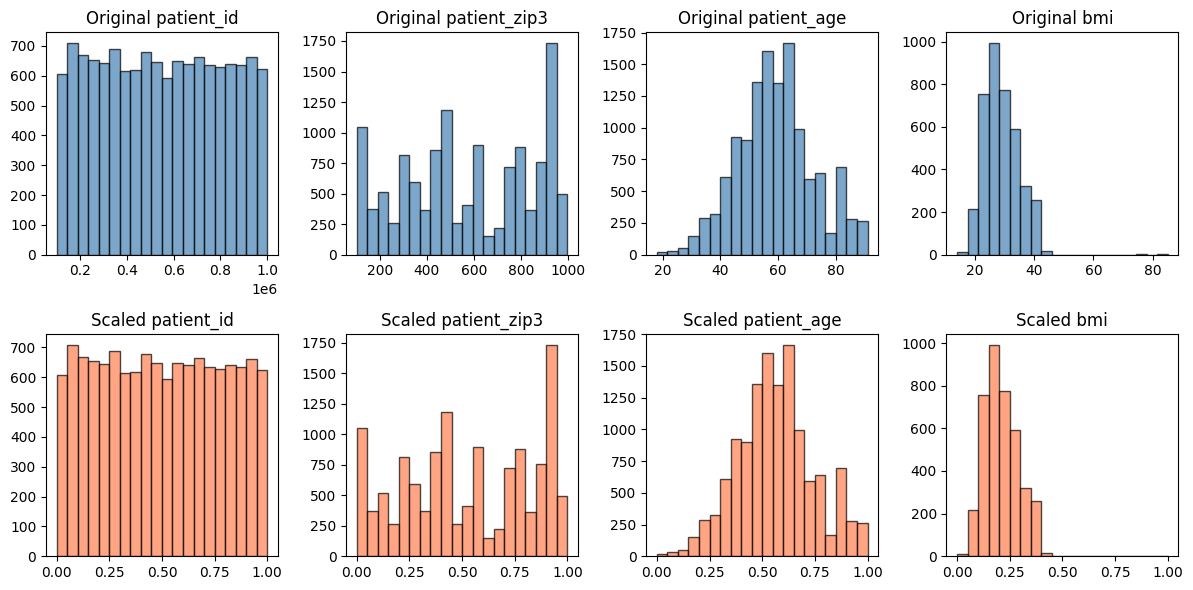

In [4]:
import matplotlib.pyplot as plt

# Select a few features to visualize
sample_features = numerical_features[:4]  # Visualize first 4 numerical features

# Plot original features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(sample_features):
    plt.subplot(2, len(sample_features), i + 1)
    plt.hist(df[feature], bins=20, color='steelblue', edgecolor='black', alpha=0.7)
    plt.title(f"Original {feature}")
    
    plt.subplot(2, len(sample_features), i + 1 + len(sample_features))
    plt.hist(df_scaled[feature], bins=20, color='coral', edgecolor='black', alpha=0.7)
    plt.title(f"Scaled {feature}")

plt.tight_layout()
plt.show()


In [ ]:
# MACHINE LEARNING

In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('training.csv.zip')

# 1. **Remove duplicated columns**
df = df.loc[:, ~df.columns.duplicated()]

# 2. **Remove columns created by one-hot encoding** 
# (Optional: Keep only original categorical feature or only the new one-hot encoded columns)
one_hot_columns = [col for col in df.columns if '_' in col]  # Example logic for one-hot column names
df = df.drop(columns=one_hot_columns)  # Drop all one-hot encoded columns if needed

# 3. **Remove row identifiers** 
row_identifiers = ['ID', 'RowNumber', 'CustomerID']  # Update these names according to your dataset
df = df.drop(columns=[col for col in row_identifiers if col in df.columns])

print(f"Remaining columns: {df.columns}")


Remaining columns: Index(['bmi', 'Region', 'Division', 'population', 'density', 'male', 'female',
       'married', 'divorced', 'widowed', 'farmer', 'hispanic', 'disabled',
       'poverty', 'veteran', 'Ozone', 'PM25', 'N02', 'DiagPeriodL90D'],
      dtype='object')


In [9]:
target_column = 'DiagPeriodL90D' 
print(f"Unique values in target column: {df[target_column].unique()}")

# For classification: ensure it's 0 and 1 (binary)
df[target_column] = df[target_column].replace({'yes': 1, 'no': 0})  # Example of binary encoding

# For regression: Ensure target is numeric
df[target_column] = pd.to_numeric(df[target_column], errors='coerce')

Unique values in target column: [1 0]


In [10]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Step 1: Split into train + temp (temp = validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Split temp into validation + test (15% each of the total dataset)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train set: {X_train.shape}, Validatiocn set: {X_val.shape}, Test set: {X_test.shape}")


Train set: (9034, 18), Validation set: (1936, 18), Test set: (1936, 18)


In [28]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('training.csv.zip')

# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode categorical features
df = pd.get_dummies(df, drop_first=True)  # Encodes all categorical columns

# Separate features (X) and target (y)
target_column = 'DiagPeriodL90D'  # Replace 'target' with your actual target column name
X = df.drop(columns=[target_column])
y = df[target_column]

# Split data into train, validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy on validation set: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Accuracy on validation set: 0.61

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.01      0.01       753
           1       0.61      1.00      0.76      1183

    accuracy                           0.61      1936
   macro avg       0.59      0.50      0.38      1936
weighted avg       0.60      0.61      0.47      1936



/Users/devinvo/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# Predict on test set
y_test_pred = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

submission = pd.DataFrame({'Id': X_test.index, 'Prediction': y_test_pred})
submission.to_csv('submission.csv', index=False)
print("Submission file created: `submission.csv`")


Submission file created: `submission.csv`


In [20]:
from IPython.display import FileLink

FileLink("submission.csv")


/Users/devinvo/kaggle project/submission.csv